In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.shape

(6435, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe(include=object).T

,count,unique,top,freq
Date,6435,143,05-02-2010,45


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [9]:
data.Date = pd.to_datetime(data.Date)
data['year'], data['quarter'],data['month'],data['week'],data['day'],data['day_of_month'] = data['Date'].dt.year, data['Date'].dt.quarter,data['Date'].dt.month,data['Date'].dt.week,data['Date'].dt.weekday,data['Date'].dt.day
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,quarter,month,week,day,day_of_month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,17,6,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,4,12,48,3,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,7,4,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,8,4,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,2,5,18,0,3


In [10]:
for i in data.columns:
    print(f'{i}:{data[i].nunique()}')

Store:45
Date:143
Weekly_Sales:6435
Holiday_Flag:2
Temperature:3528
Fuel_Price:892
CPI:2145
Unemployment:349
year:3
quarter:4
month:12
week:52
day:7
day_of_month:31


In [11]:
data['Date'].value_counts()

2010-05-02    45
2011-12-23    45
2011-11-11    45
2011-11-18    45
2011-11-25    45
              ..
2011-07-01    45
2011-01-14    45
2011-01-21    45
2011-01-28    45
2012-10-26    45
Name: Date, Length: 143, dtype: int64

In [12]:
### We can see that in year 2010, the data for the month of January is not available. 
###In the year 2012, the data for the months of November and December are not available. 
### As the data for these 3 months are not available; the yearly comparison, quarterly comparison and monthly comparison
### will be affected.

In [13]:
import matplotlib.pyplot as plt


# Data Exploration

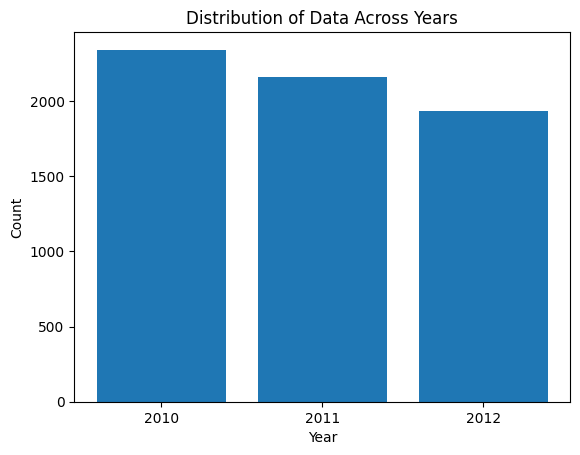

In [14]:
plt.bar(data['year'].unique(), data['year'].value_counts())
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Data Across Years')
plt.xticks(data['year'].unique())
plt.show()

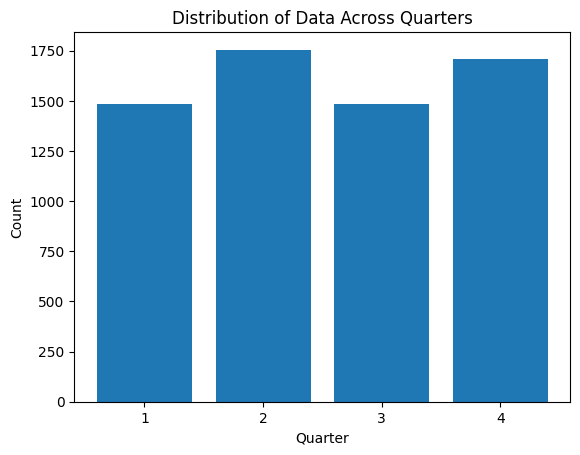

In [15]:
plt.bar(data['quarter'].unique(), data['quarter'].value_counts())
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Distribution of Data Across Quarters')
plt.xticks(data['quarter'].unique())
plt.show()

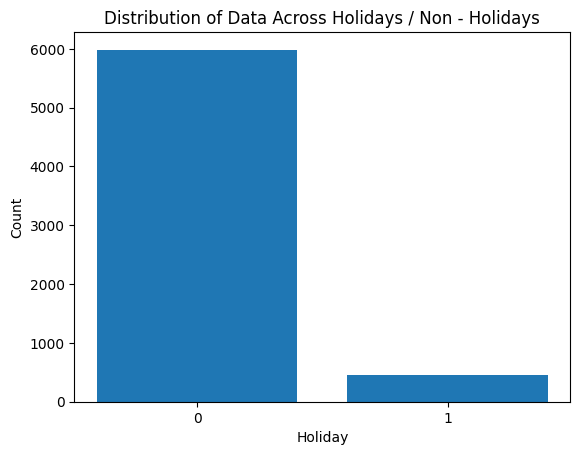

In [16]:
plt.bar(data['Holiday_Flag'].unique(), data['Holiday_Flag'].value_counts())
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Distribution of Data Across Holidays / Non - Holidays')
plt.xticks(data['Holiday_Flag'].unique())
plt.show()

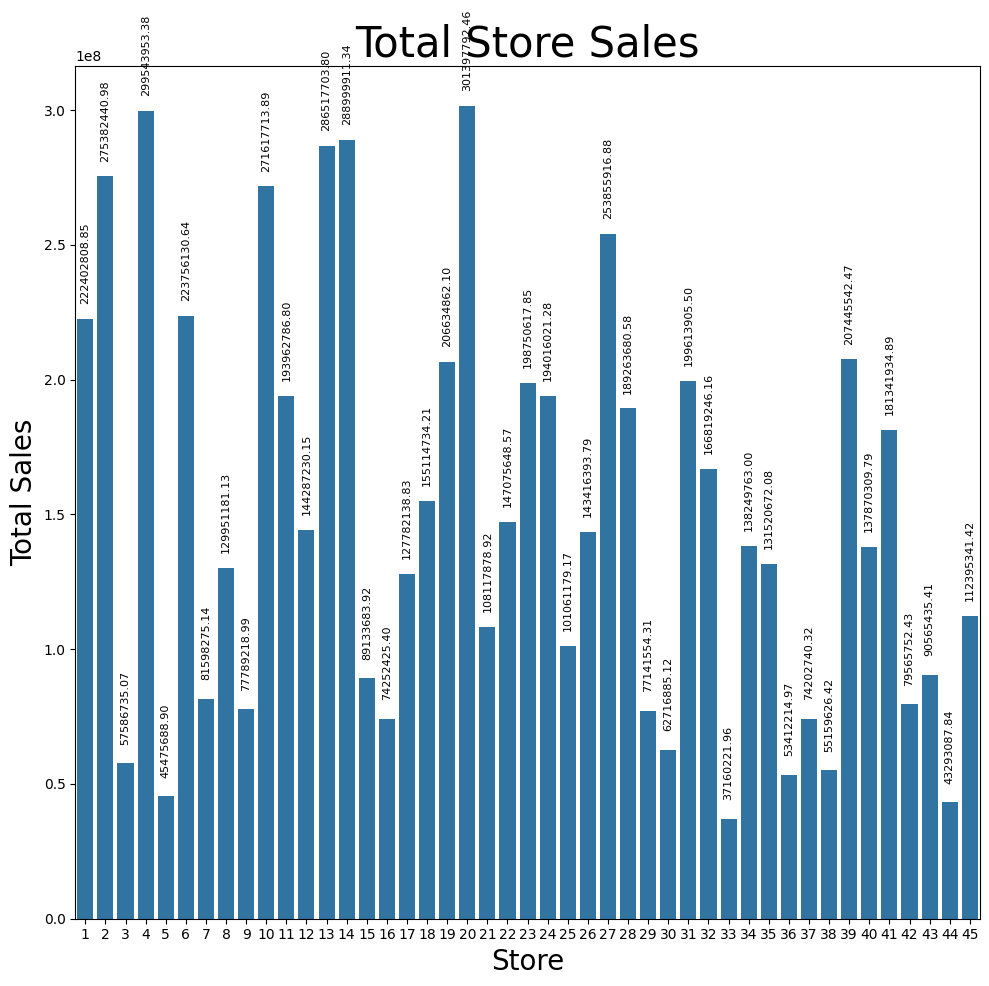

In [17]:
#Storewise Sales Anlysis

store_sales = data.groupby('Store').agg({'Weekly_Sales':'sum'}).sort_index()

plt.figure(figsize=(10, 10))
ax = sns.barplot(x=store_sales.index, y=store_sales['Weekly_Sales'])
plt.title('Total Store Sales', fontsize=30)
plt.xlabel('Store', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 40), 
                textcoords='offset points', rotation='vertical', fontsize=8)

plt.tight_layout()
plt.show()

Conclusion : Store 20 has the highest sales. 

In [18]:
### Top 5 stores with largest sales : 

print(' The top 5 stores with the largest sales are : \n',store_sales.nlargest(5,'Weekly_Sales'))

 The top 5 stores with the largest sales are : 
        Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08


In [19]:
### Top 5 stores with lowest sales : store_sales.nlargest(5,'Weekly_Sales')

print(' The top 5 stores with the lowest sales are : \n',store_sales.nsmallest(5,'Weekly_Sales'))

 The top 5 stores with the lowest sales are : 
        Weekly_Sales
Store              
33      37160221.96
44      43293087.84
5       45475688.90
36      53412214.97
38      55159626.42


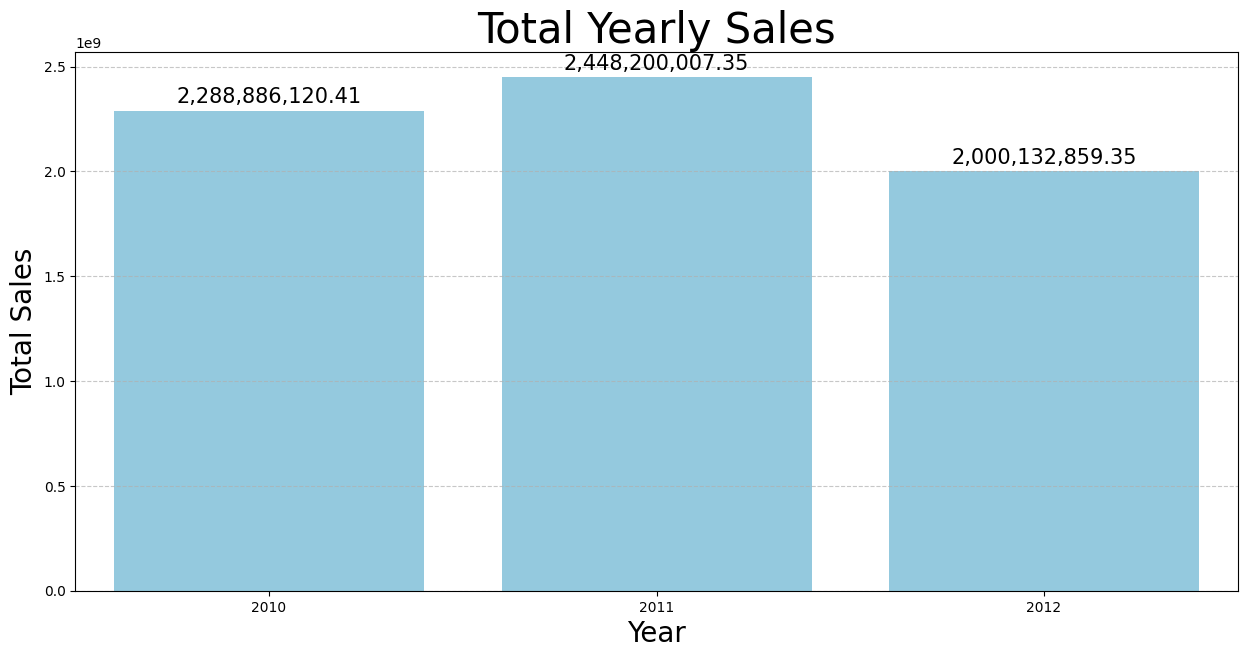

In [20]:
#Yearly Sales Anlysis
yearly_sales = data.groupby('year').agg({'Weekly_Sales':'sum'}).sort_index()

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=yearly_sales.index, y=yearly_sales['Weekly_Sales'], color='skyblue')
plt.title('Total Yearly Sales', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', rotation='horizontal', fontsize=15)

plt.show()

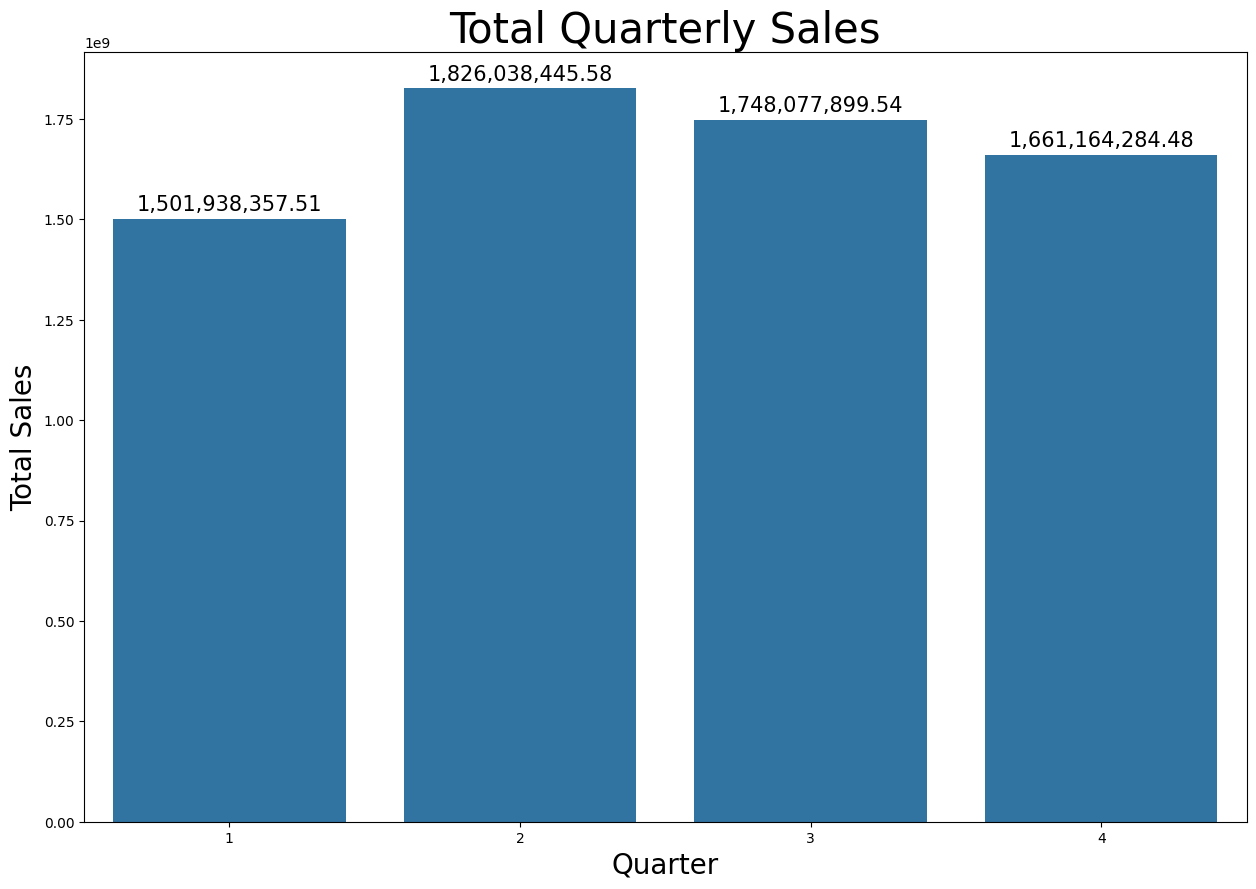

In [21]:
# Quarterly Sales Analysis
quarterly_sales = data.groupby('quarter').agg({'Weekly_Sales': 'sum'}).sort_index()

plt.figure(figsize=(15, 10))
ax = sns.barplot(x=quarterly_sales.index.astype(str), y=quarterly_sales['Weekly_Sales'])
plt.title('Total Quarterly Sales', fontsize=30)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', rotation='horizontal', fontsize=15)

plt.show()

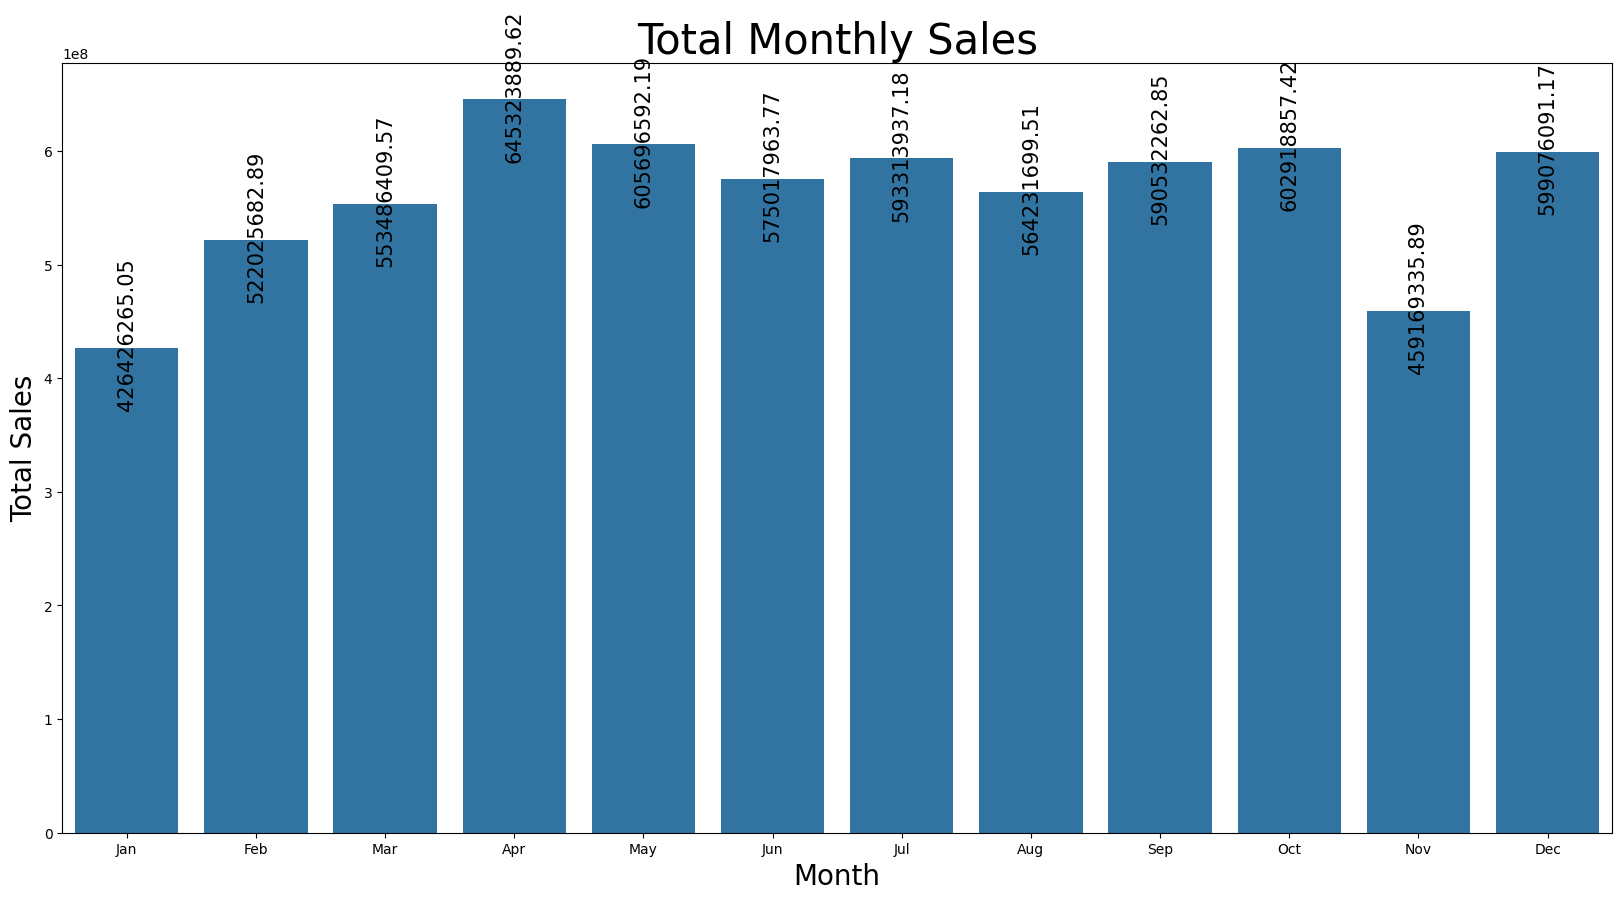

In [22]:
# Monthly Sales Analysis
import calendar
monthly_sales = data.groupby('month').agg({'Weekly_Sales': 'sum'}).sort_index()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=monthly_sales.index, y=monthly_sales['Weekly_Sales'])
plt.title('Total Monthly Sales', fontsize=30)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(range(12), month_labels, rotation='horizontal')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', rotation='vertical', fontsize=15)

plt.show()

In [23]:
monthly_sales

,Weekly_Sales
month,
1,4.264263e+08
2,5.220257e+08
3,5.534864e+08
4,6.453239e+08
5,6.056966e+08
6,5.750180e+08
7,5.933139e+08
8,5.642317e+08
9,5.905323e+08


In [24]:
### We can see that in year 2010, the data for the month of January is not available. 
###In the year 2012, the data for the months of November and December are not available. 
### As the data for these 3 months are not available; the yearly comparison, quarterly comparison and monthly comparison
### will be affected.

monthly_sales['adjusted_weekly_sales'] = monthly_sales['Weekly_Sales'].copy()

# Indices for Jan, Nov, and Dec
special_months = [1, 11, 12]

# Apply adjustments based on the specified conditions
monthly_sales.loc[special_months, 'adjusted_weekly_sales'] /= 2
monthly_sales.loc[~monthly_sales.index.isin(special_months), 'adjusted_weekly_sales'] /= 3

# Display the updated DataFrame
print(monthly_sales)

       Weekly_Sales  adjusted_weekly_sales
month                                     
1      4.264263e+08           2.132131e+08
2      5.220257e+08           1.740086e+08
3      5.534864e+08           1.844955e+08
4      6.453239e+08           2.151080e+08
5      6.056966e+08           2.018989e+08
6      5.750180e+08           1.916727e+08
7      5.933139e+08           1.977713e+08
8      5.642317e+08           1.880772e+08
9      5.905323e+08           1.968441e+08
10     6.029189e+08           2.009730e+08
11     4.591693e+08           2.295847e+08
12     5.990761e+08           2.995380e+08


In [25]:
### Top 5 months with highest sales : 

print(' The top 5 months with the highest sales are : \n',monthly_sales.nlargest(5,'adjusted_weekly_sales')['adjusted_weekly_sales'])

 The top 5 months with the highest sales are : 
 month
12    2.995380e+08
11    2.295847e+08
4     2.151080e+08
1     2.132131e+08
5     2.018989e+08
Name: adjusted_weekly_sales, dtype: float64


In [26]:
### Top 5 months with lowest sales : 

print(' The top 5 months with the lowest sales are : \n',monthly_sales.nsmallest(5,'adjusted_weekly_sales')['adjusted_weekly_sales'])

 The top 5 months with the lowest sales are : 
 month
2    1.740086e+08
3    1.844955e+08
8    1.880772e+08
6    1.916727e+08
9    1.968441e+08
Name: adjusted_weekly_sales, dtype: float64


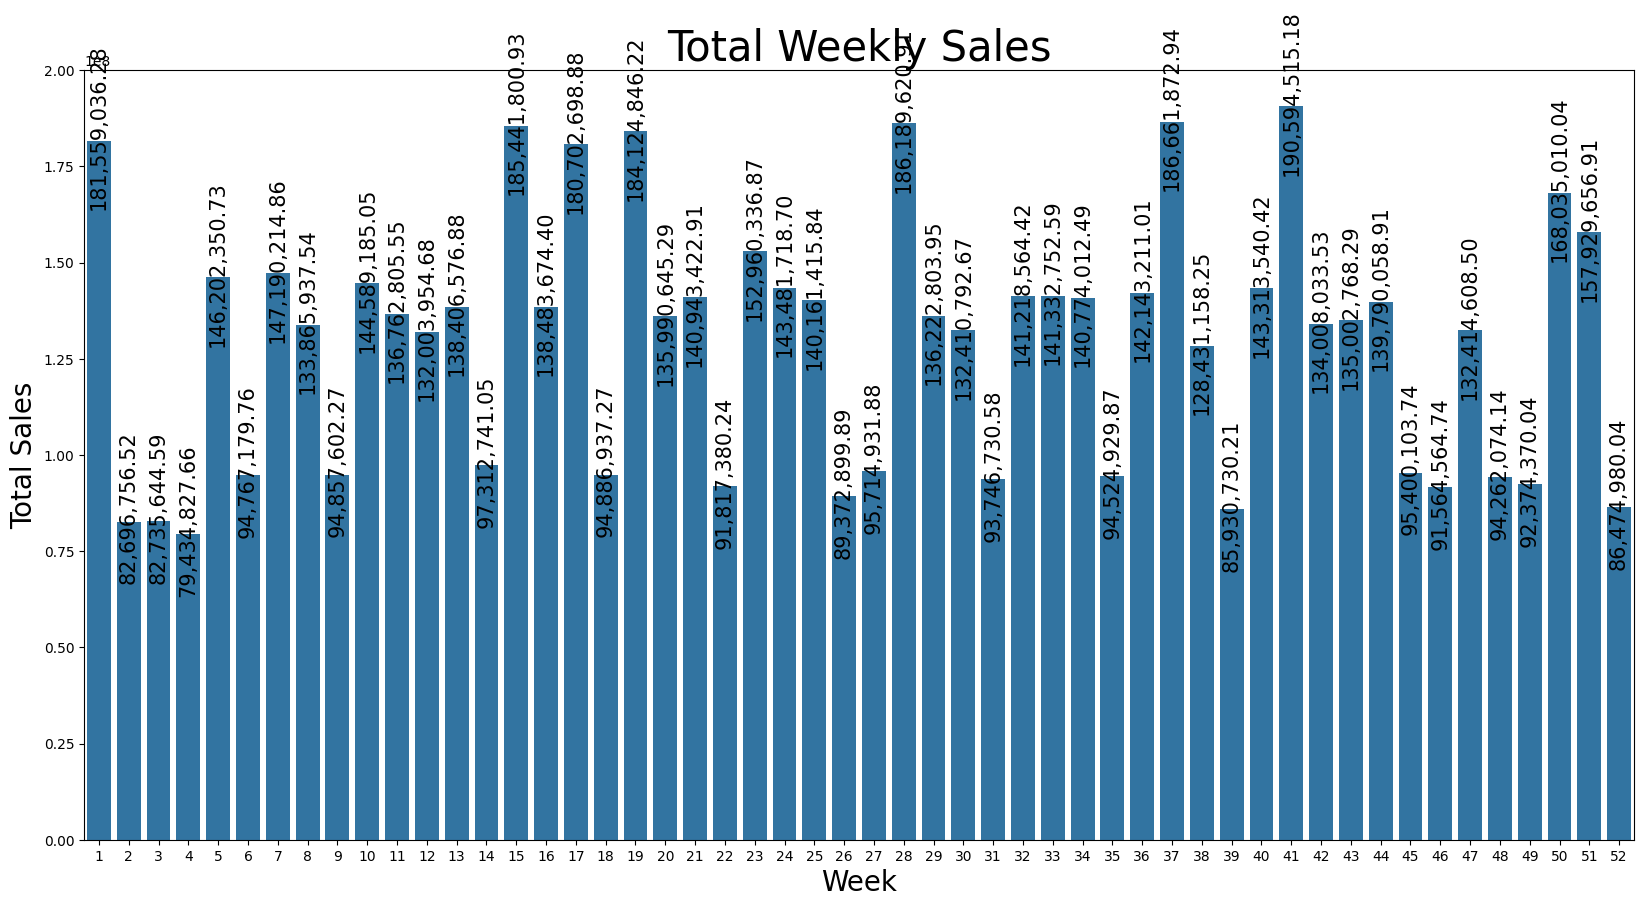

In [27]:
# Weekly Sales Analysis
weekly_sales = data.groupby('week').agg({'Weekly_Sales': 'sum'}).sort_index()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=weekly_sales.index, y=weekly_sales['Weekly_Sales'])
plt.title('Total Weekly Sales', fontsize=30)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', rotation='vertical', fontsize=15)

plt.show()

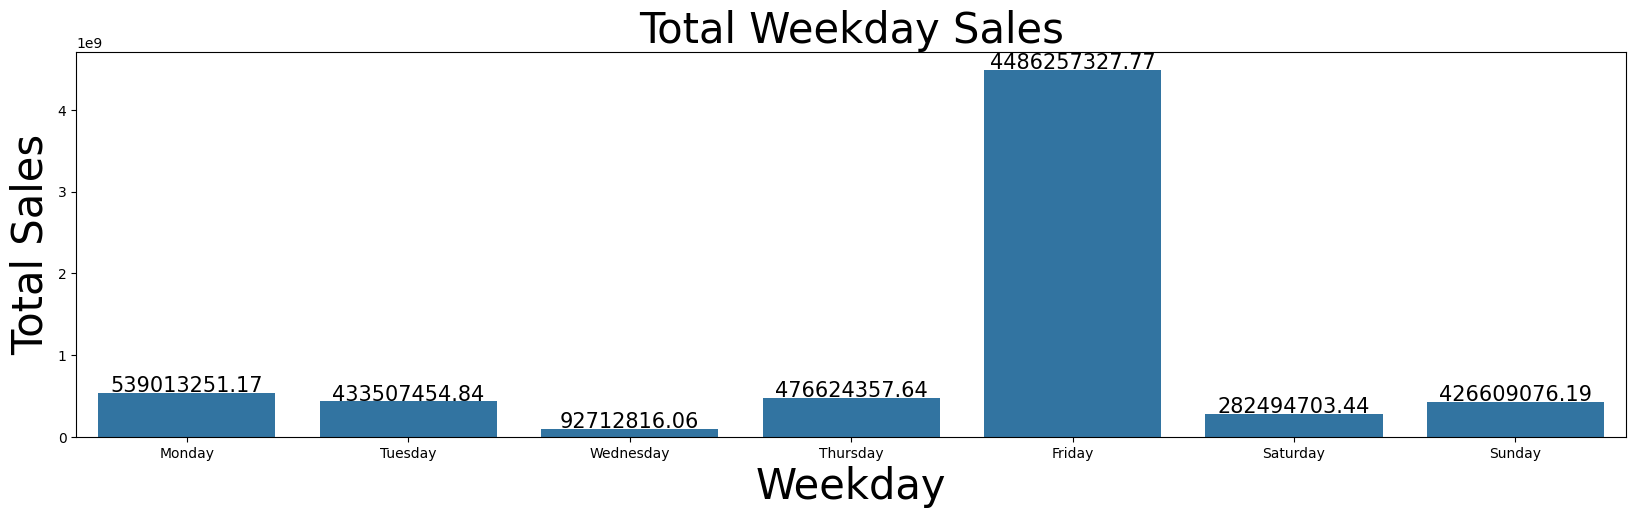

In [28]:
# Weekday Sales Analysis
weekday_sales = data.groupby('day').agg({'Weekly_Sales': 'sum'})

plt.figure(figsize=(20, 5))
ax = sns.barplot(x=weekday_sales.index, y=weekday_sales['Weekly_Sales'])
plt.title('Total Weekday Sales', fontsize=30)
plt.xlabel('Weekday', fontsize=30)
plt.ylabel('Total Sales', fontsize=30)
weekday_labels = [calendar.day_name[i] for i in range(7)]  
plt.xticks(range(7), weekday_labels, rotation='horizontal')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points', rotation='horizontal', fontsize=15)

plt.show()

In [29]:
### Conclusion: Friday has the highest sales whereas Wednesday has the lowest sales.

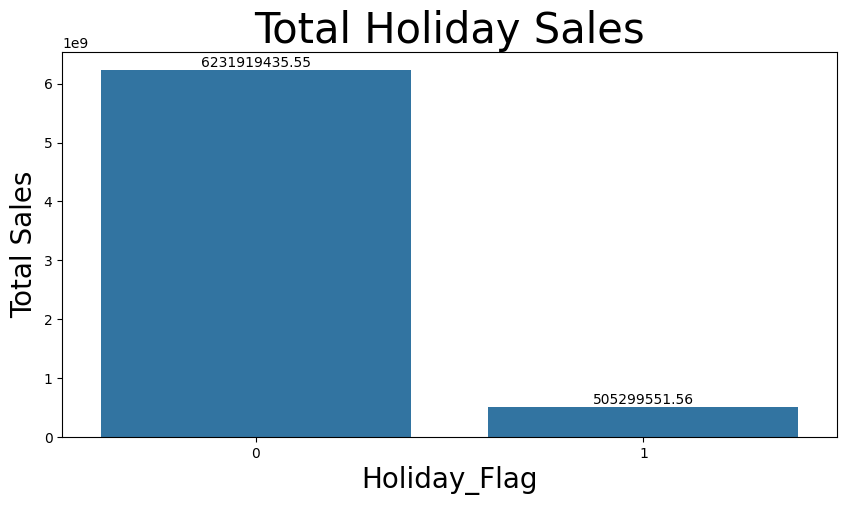

In [30]:
#Holiday Sales Anlysis
holiday_sales = data.groupby('Holiday_Flag').agg({'Weekly_Sales': 'sum'})

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=holiday_sales.index.tolist(), y=holiday_sales['Weekly_Sales'])
plt.title('Total Holiday Sales', fontsize=30)
plt.xlabel('Holiday_Flag', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points', rotation='horizontal', fontsize=10)

plt.show()

In [31]:
holiday_sales

,Weekly_Sales
Holiday_Flag,
0,6.231919e+09
1,5.052996e+08


In [32]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [33]:
holiday_sales.loc[0]/data['Holiday_Flag'].value_counts()[0]

Weekly_Sales    1.041256e+06
Name: 0, dtype: float64

In [34]:
holiday_sales.loc[1]/data['Holiday_Flag'].value_counts()[1]

Weekly_Sales    1.122888e+06
Name: 1, dtype: float64

In [35]:
### Thus, we can infer the sales on holidays are higher

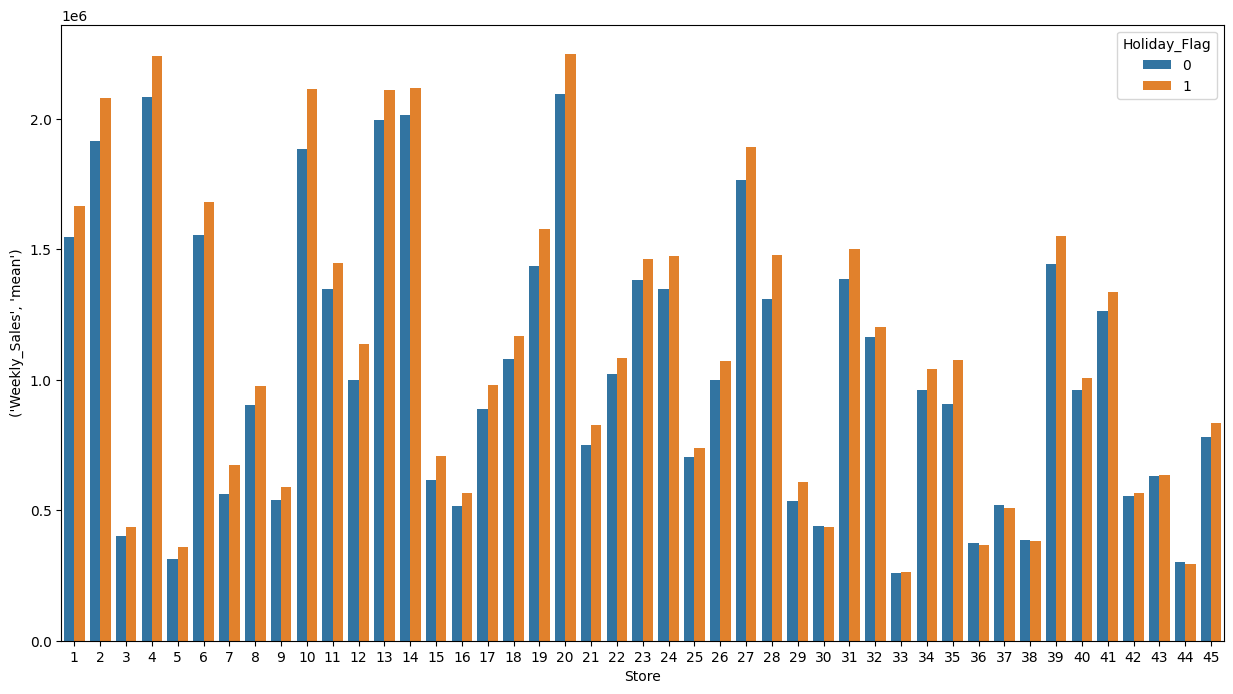

In [36]:
###Aggregating Weekly sales based on store and holiday flag

Store_new = data.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales':['mean','max','sum']})
Store_new = Store_new.reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store',y = ('Weekly_Sales',  'mean'),hue= 'Holiday_Flag',data=Store_new)
plt.show()


Conclusion :

1) People generally tend to spend more during holiday weeks
2) The average spending is more during holiday weeks than normal weeks.

In [37]:
yearly_sales=yearly_sales.reset_index()
quarterly_sales=quarterly_sales.reset_index()
monthly_sales=monthly_sales.reset_index()
weekday_sales=weekday_sales.reset_index()
holiday_sales=holiday_sales.reset_index()

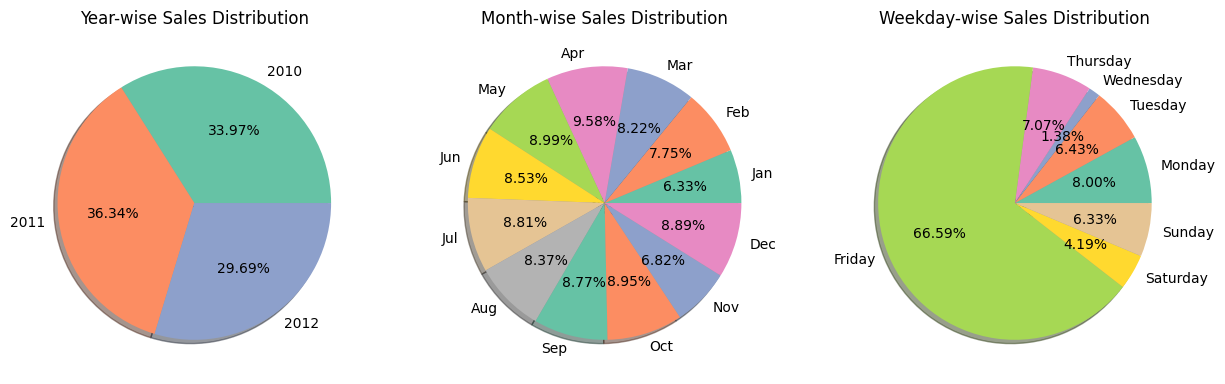

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.pie(yearly_sales['Weekly_Sales'], labels =yearly_sales['year'],autopct = '%1.2f%%', 
        shadow=True,colors=sns.color_palette('Set2'),labeldistance=1.1)
plt.title('Year-wise Sales Distribution')
plt.grid()

plt.subplot(1, 3, 2)
labels=[calendar.month_abbr[i] for i in range(1, 13)]
plt.pie(monthly_sales['Weekly_Sales'], labels =labels,autopct = '%1.2f%%', 
        shadow=True,colors=sns.color_palette('Set2'),labeldistance=1.1)
plt.title('Month-wise Sales Distribution')
plt.grid()

plt.subplot(1, 3, 3)
weekday_labels = [calendar.day_name[i] for i in range(7)]  
plt.pie(weekday_sales['Weekly_Sales'], labels =weekday_labels,autopct = '%1.2f%%', 
        shadow=True,colors=sns.color_palette('Set2'),labeldistance=1.1)
plt.title('Weekday-wise Sales Distribution')
plt.grid()

plt.show()

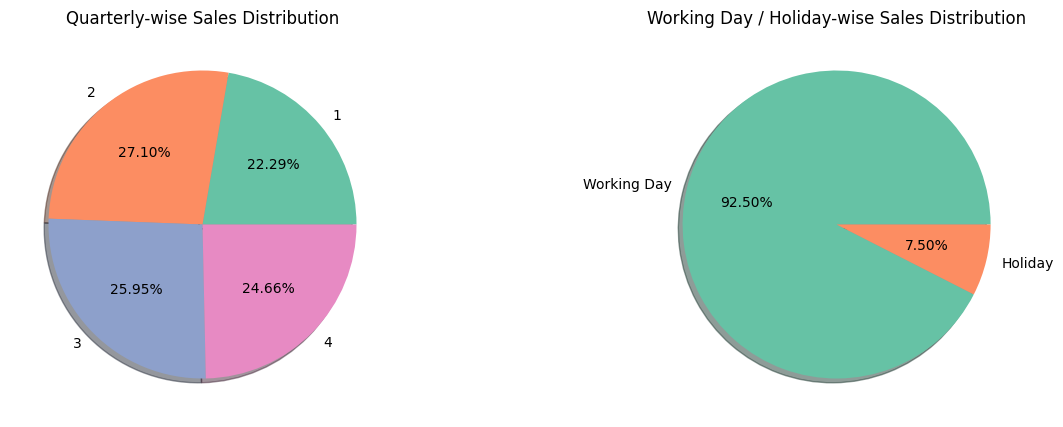

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.pie(quarterly_sales['Weekly_Sales'], labels =quarterly_sales['quarter'],autopct = '%1.2f%%', 
        shadow=True,colors=sns.color_palette('Set2'),labeldistance=1.1)
plt.title('Quarterly-wise Sales Distribution')
plt.grid()

plt.subplot(1, 2, 2)
plt.pie(holiday_sales['Weekly_Sales'], labels =['Working Day','Holiday'],autopct = '%1.2f%%', 
        shadow=True,colors=sns.color_palette('Set2'),labeldistance=1.1)
plt.title('Working Day / Holiday-wise Sales Distribution')
plt.grid()

Text(0.5, 1.0, 'CPI')

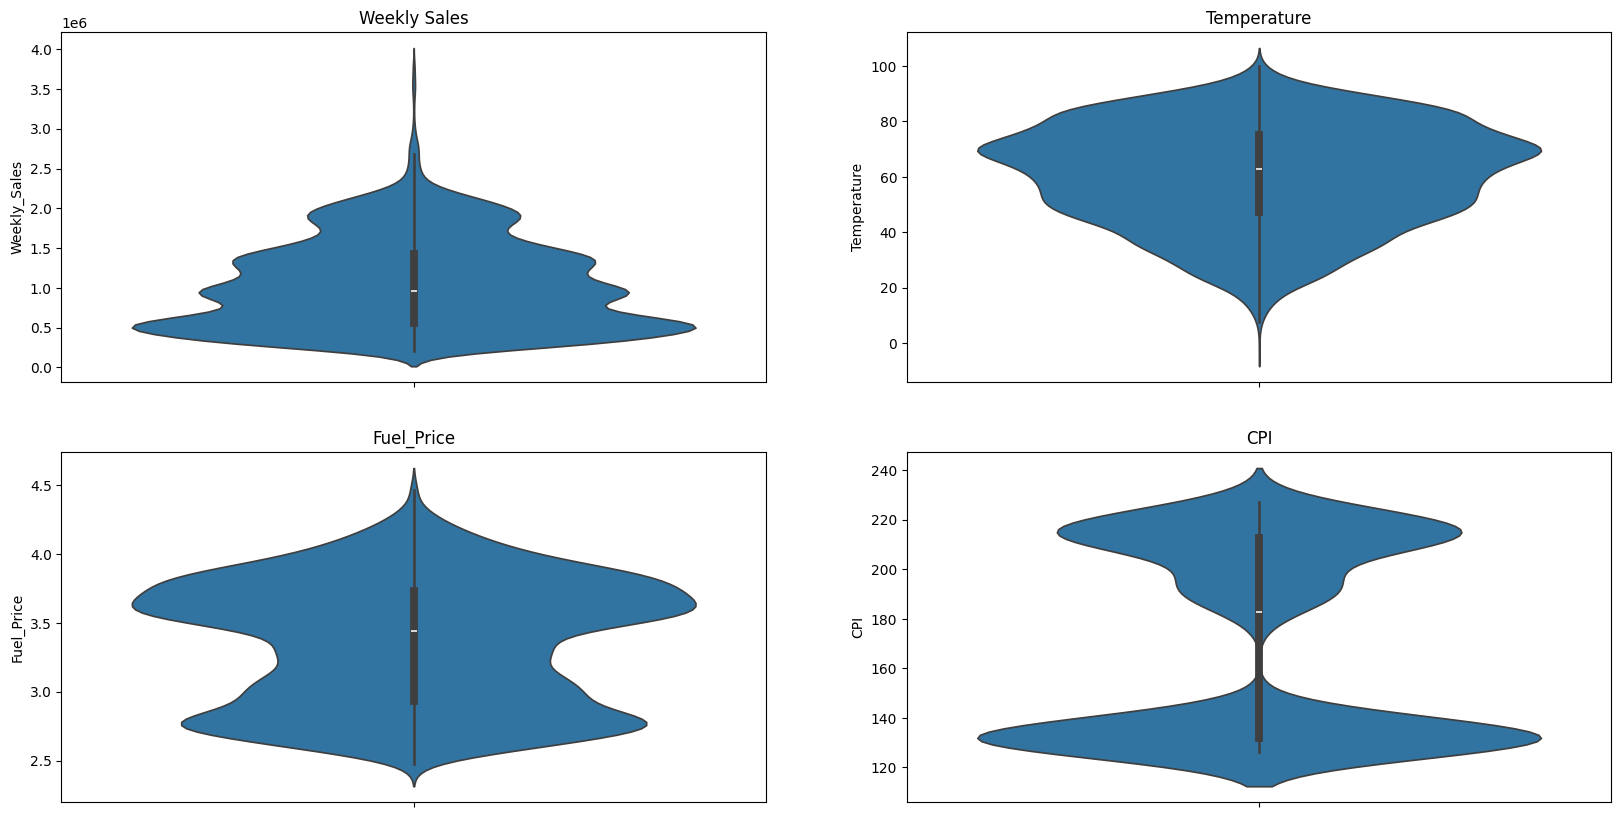

In [40]:
###Violin Plot
_,axes=plt.subplots(2,2,figsize=(20,10))
sns.violinplot(data['Weekly_Sales'],ax=axes[0][0])
axes[0][0].set_title('Weekly Sales')
sns.violinplot(data['Temperature'],ax=axes[0][1])
axes[0][1].set_title('Temperature')
sns.violinplot(data['Fuel_Price'],ax=axes[1][0])
axes[1][0].set_title('Fuel_Price')
sns.violinplot(data['CPI'],ax=axes[1][1])
axes[1][1].set_title('CPI')

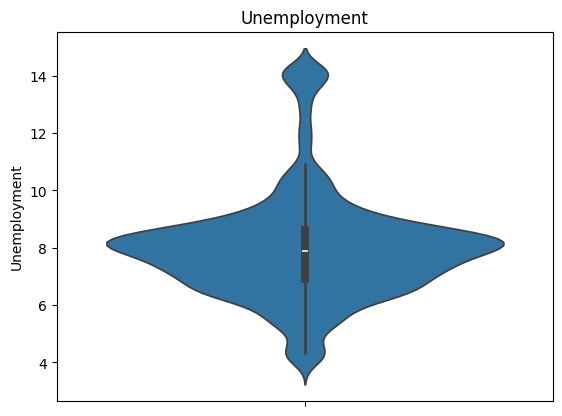

In [41]:
ax=sns.violinplot(data['Unemployment'])
ax.set_title('Unemployment')
plt.show()

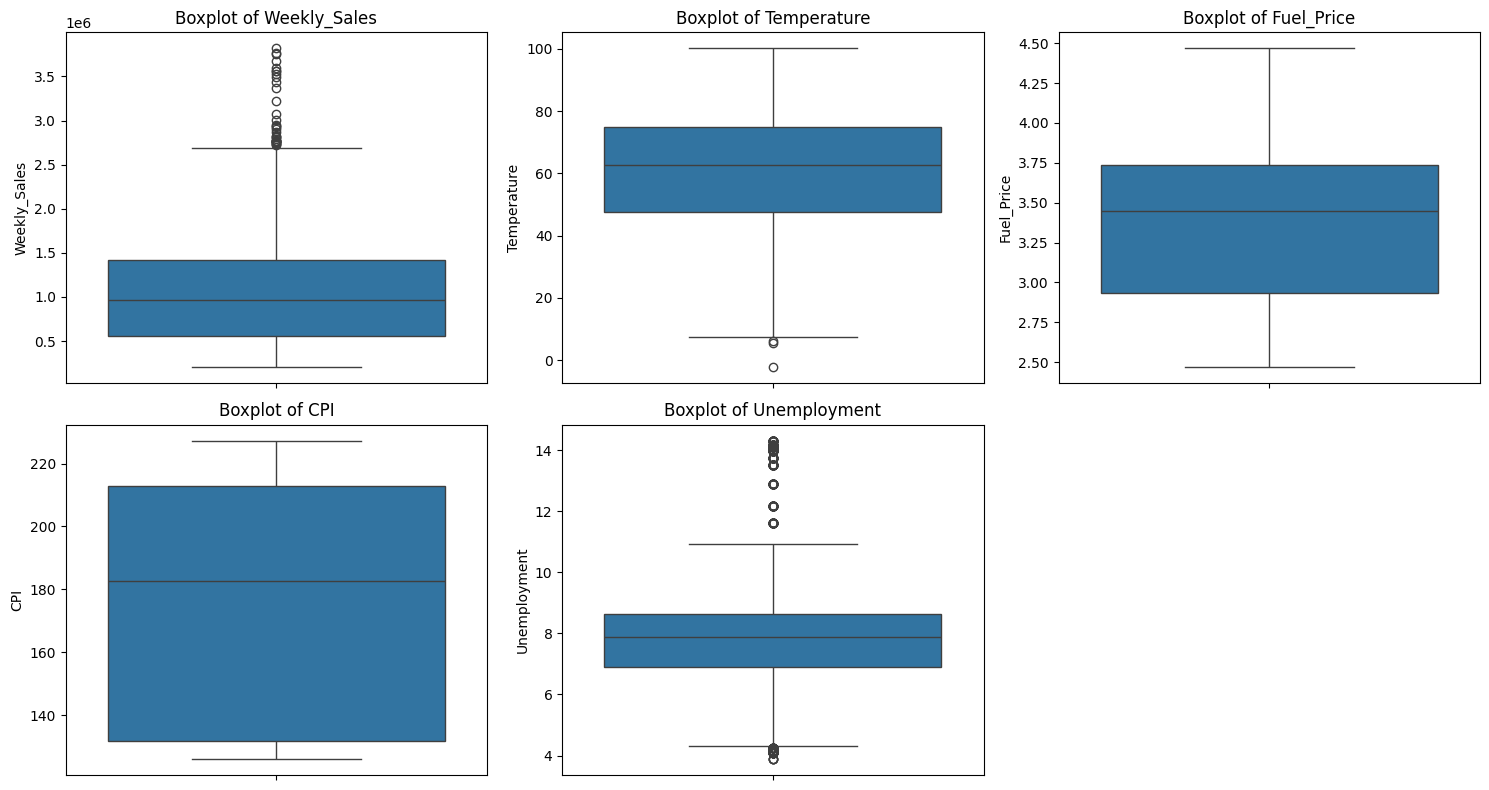

In [42]:
cols = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]

plt.figure(figsize=(15, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

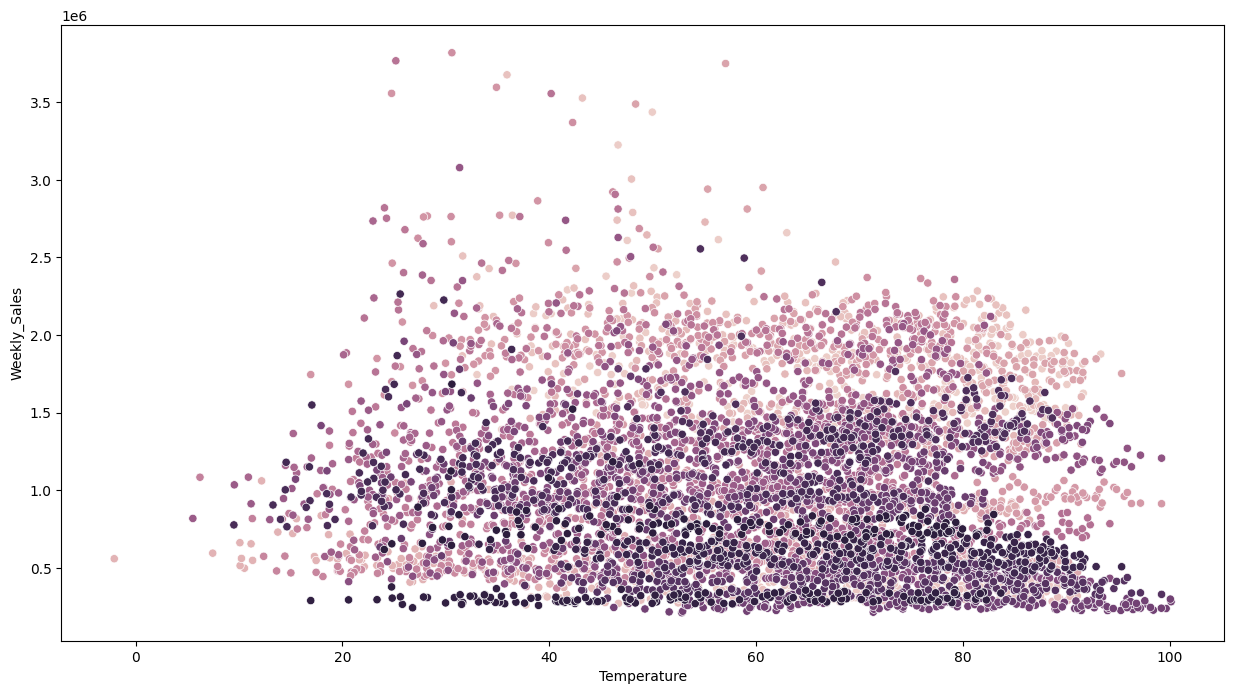

In [43]:
# Temparature vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales',hue = 'Store',data = data,legend = False)
plt.show()

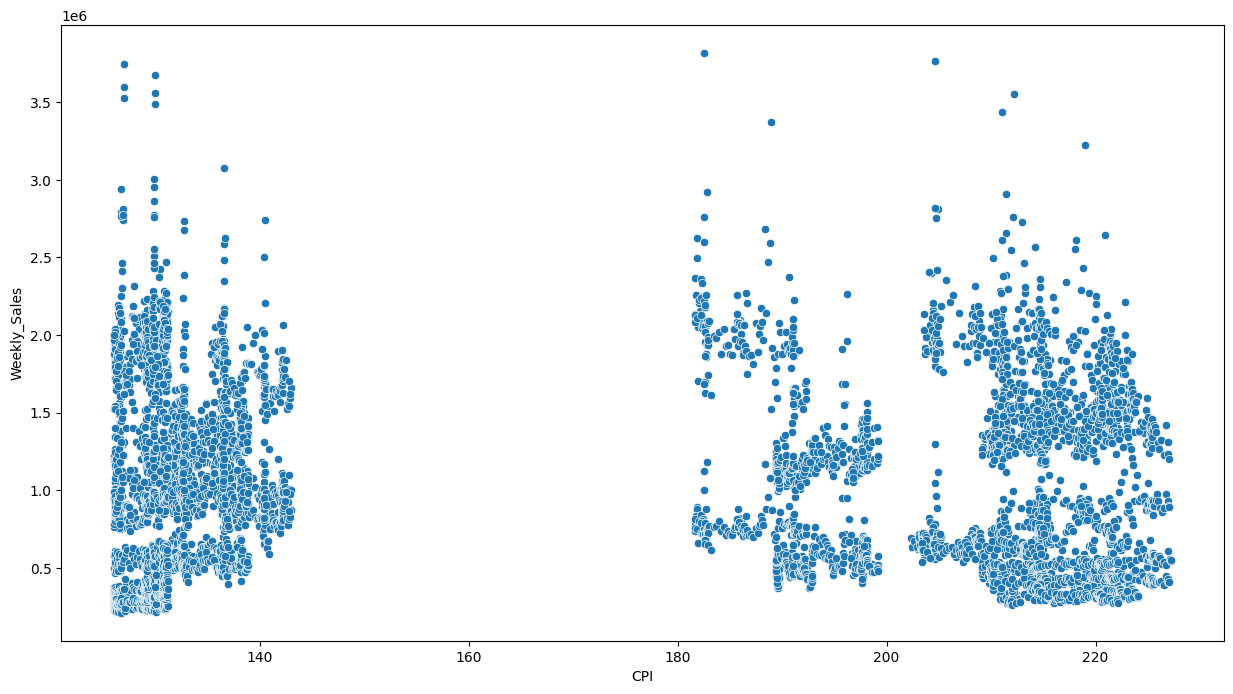

In [44]:
# CPI vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'CPI',y = 'Weekly_Sales',data = data,legend = False)
plt.show()

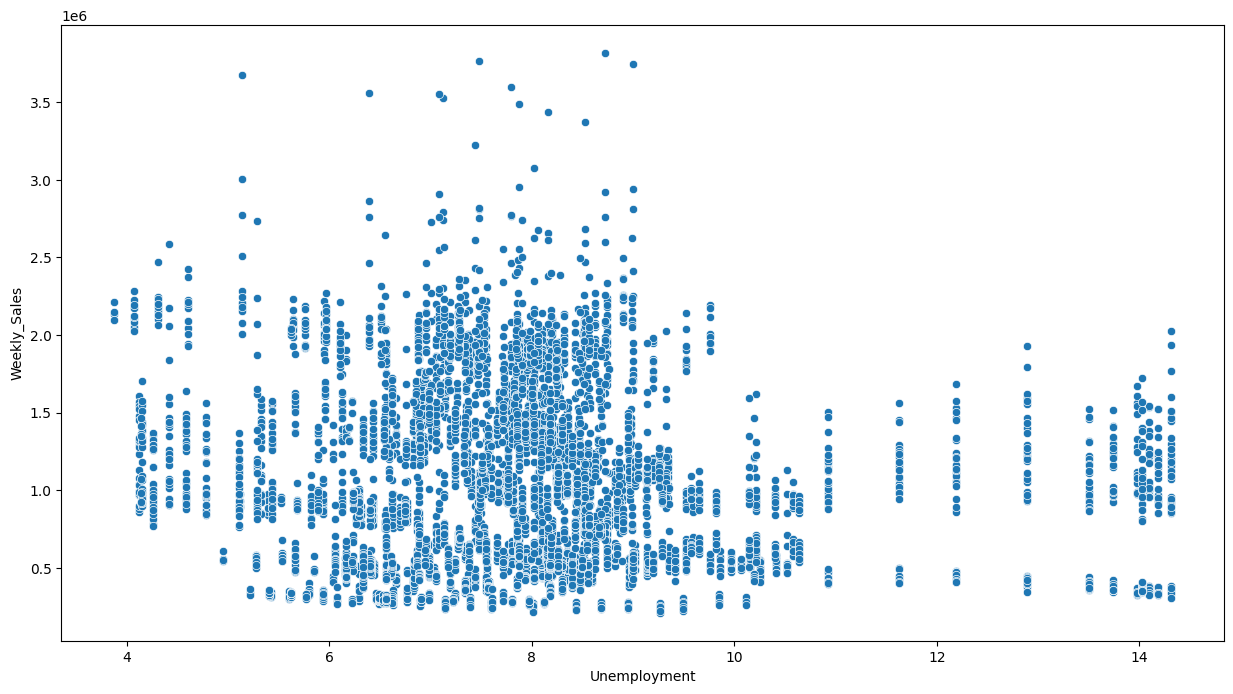

In [45]:
# Unemployment vs Week_sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales',data = data,legend = False)
plt.show()

# Questions : 

 a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

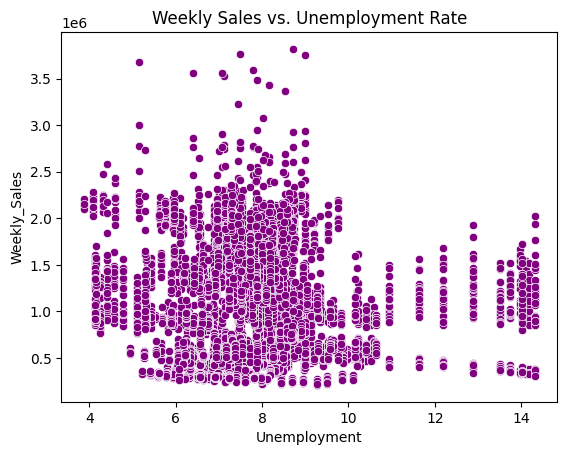

Correlation between Weekly Sales and Unemployment Rate: -0.10617608965795416


In [46]:
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=data,color='purple')
plt.title('Weekly Sales vs. Unemployment Rate')
plt.show()

a = data["Weekly_Sales"].corr(data["Unemployment"])
print(f"Correlation between Weekly Sales and Unemployment Rate: {a}")

 Since correlation is -0.106, it is considered as a weak negative correlation between weekly sales and the unemployment rate.

b. Does temperature affect the weekly sales in any manner?

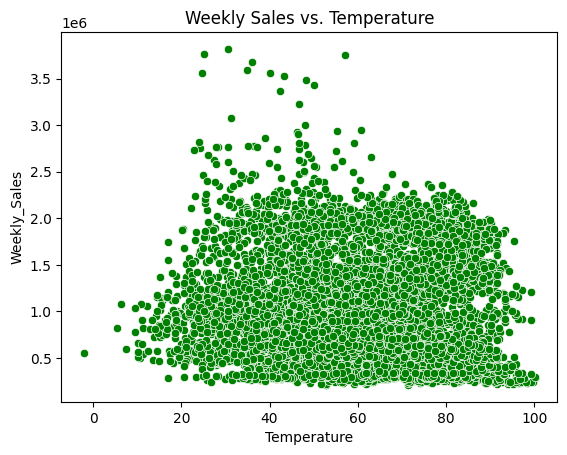

Correlation between Weekly Sales and Temperature: -0.06381001317946963


In [47]:
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=data,color='green')
plt.title('Weekly Sales vs. Temperature')
plt.show()

b = data["Weekly_Sales"].corr(data["Temperature"])
print(f"Correlation between Weekly Sales and Temperature: {b}")

 Since correlation is -0.0638, it is considered as a weak negative correlation between weekly sales and temperature.

c. How is the Consumer Price index affecting the weekly sales of various stores?

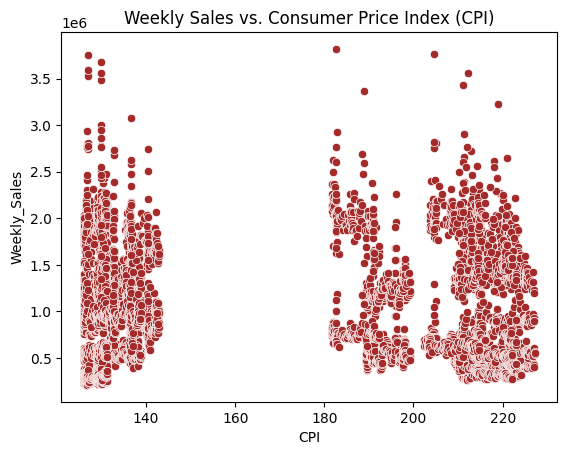

Correlation between Weekly Sales and CPI: -0.07263416204017643


In [48]:
sns.scatterplot(x="CPI", y="Weekly_Sales", data=data,color='brown')
plt.title('Weekly Sales vs. Consumer Price Index (CPI)')
plt.show()

c = data["Weekly_Sales"].corr(data["CPI"])
print(f"Correlation between Weekly Sales and CPI: {c}")

 Since correlation is -0.072, it is considered as a weak negative correlation between weekly sales and CPI.

d. Top performing stores according to the historical data.

In [49]:
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
print("Top Performing Stores : \n ", top_stores)


Top Performing Stores : 
  Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


e. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [50]:
worst_store = data.groupby('Store')['Weekly_Sales'].sum().idxmin()
worst_store_sales = data.groupby('Store')['Weekly_Sales'].sum().min()
print(f"Worst Performing Store: {worst_store}, Sales: {worst_store_sales}")

difference = top_stores.max() - worst_store_sales
print(f"Difference between highest and lowest performing stores: {difference}")

Worst Performing Store: 33, Sales: 37160221.96
Difference between highest and lowest performing stores: 264237570.49999997


f. If the weekly sales show a seasonal trend, when and what could be the reason?

In [51]:
df=pd.read_csv('walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [52]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

Text(0, 0.5, 'Total Weekly Sales')

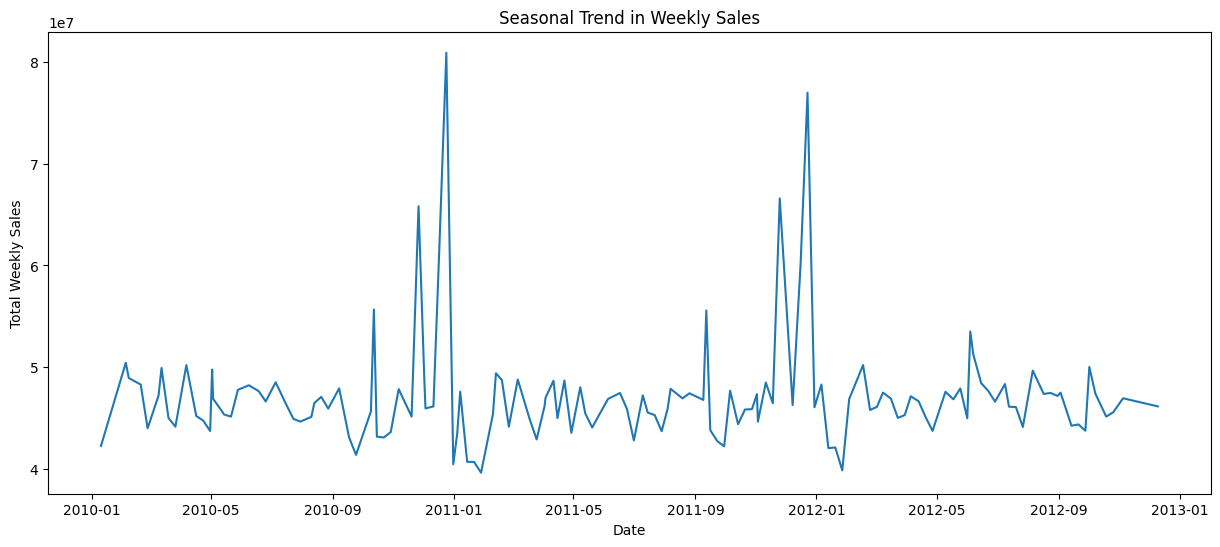

In [53]:
weekly_sales_by_date = df.groupby(df.index)['Weekly_Sales'].sum()

weekly_sales_df = pd.DataFrame({'Weekly_Sales': weekly_sales_by_date.values}, index=weekly_sales_by_date.index)

plt.figure(figsize=(15, 6))
sns.lineplot(x=weekly_sales_df.index, y=weekly_sales_df['Weekly_Sales'])
plt.title('Seasonal Trend in Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')

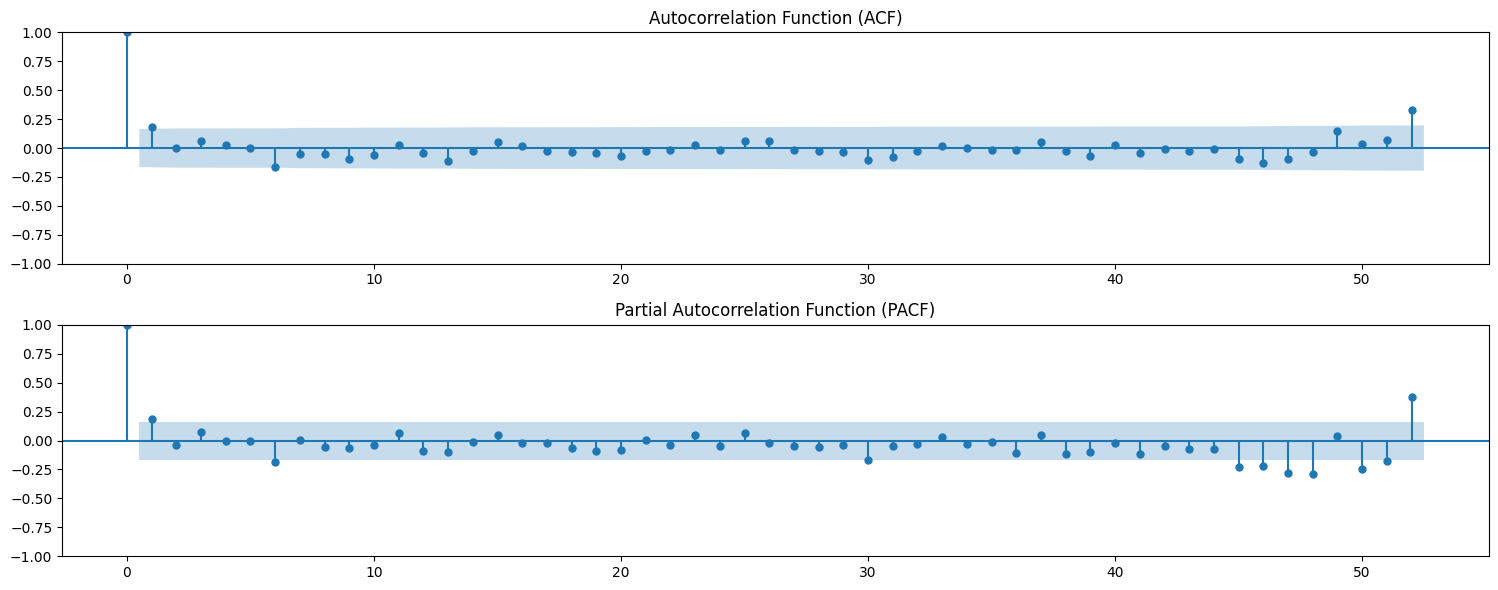

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plot_acf(weekly_sales_df['Weekly_Sales'], lags=52, ax=plt.gca(), title='Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(weekly_sales_df['Weekly_Sales'], lags=52, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

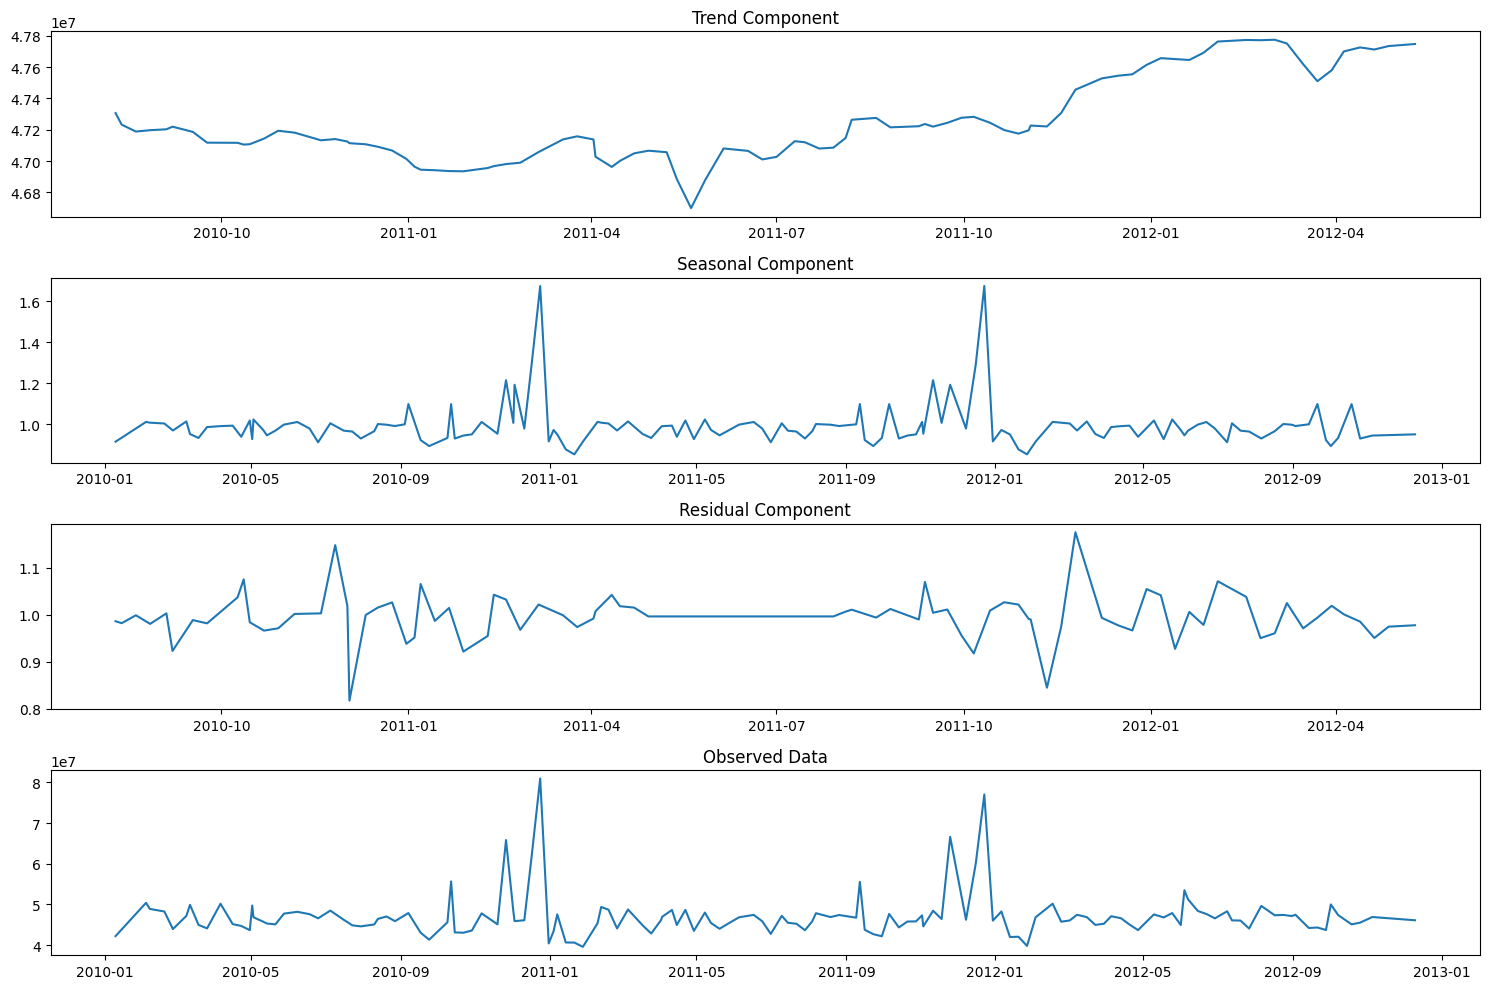

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(weekly_sales_df['Weekly_Sales'], model='multiplicative', period=52)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed Data')

plt.tight_layout()
plt.show()

From the 'seasonal component' graph,we can see the major peaks before the ending of each year  2010,2011 with the holidays - Thanksgiving Day and New Year and events like Christmas.

# Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

# Method 1 - SARIMAX 

In [56]:
data = pd.read_csv('walmart.csv')
data.set_index('Date', inplace=True)
## Select any store id from a list of 45 stores
a= int(input("Enter the store id:"))
store = data[data.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:4


Weekly_Sales    float64
dtype: object

In [57]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,1900246.47
01-06-2012,2179360.94
01-07-2011,2051533.53
01-10-2010,1842821.02
02-03-2012,2206319.90
02-04-2010,1979247.12
02-07-2010,1881337.21
02-09-2011,2078420.31
02-12-2011,2180999.26


In [58]:
sales.reset_index(inplace = True)
sales['Date'] = pd.to_datetime(sales['Date'])
sales.set_index('Date',inplace = True)

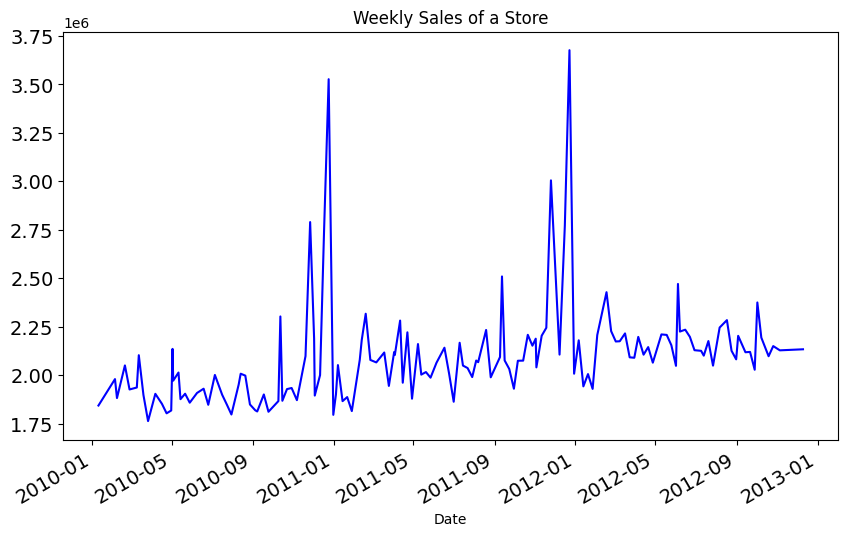

In [59]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

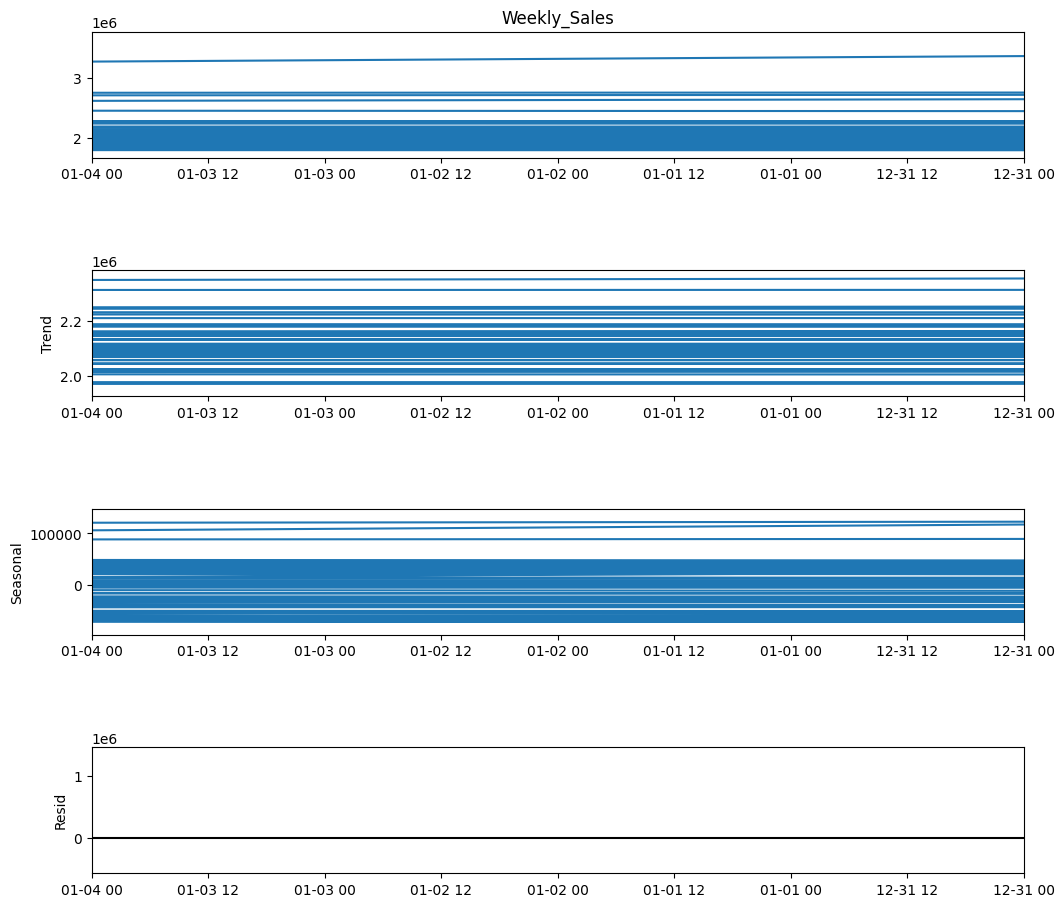

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [61]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store5 = data[data.Store == 5]
sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes



Weekly_Sales    float64
dtype: object

In [62]:
sales5.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales5['Date'] = pd.to_datetime(sales5['Date'])
# resetting date back to the index
sales5.set_index('Date',inplace = True)

In [63]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

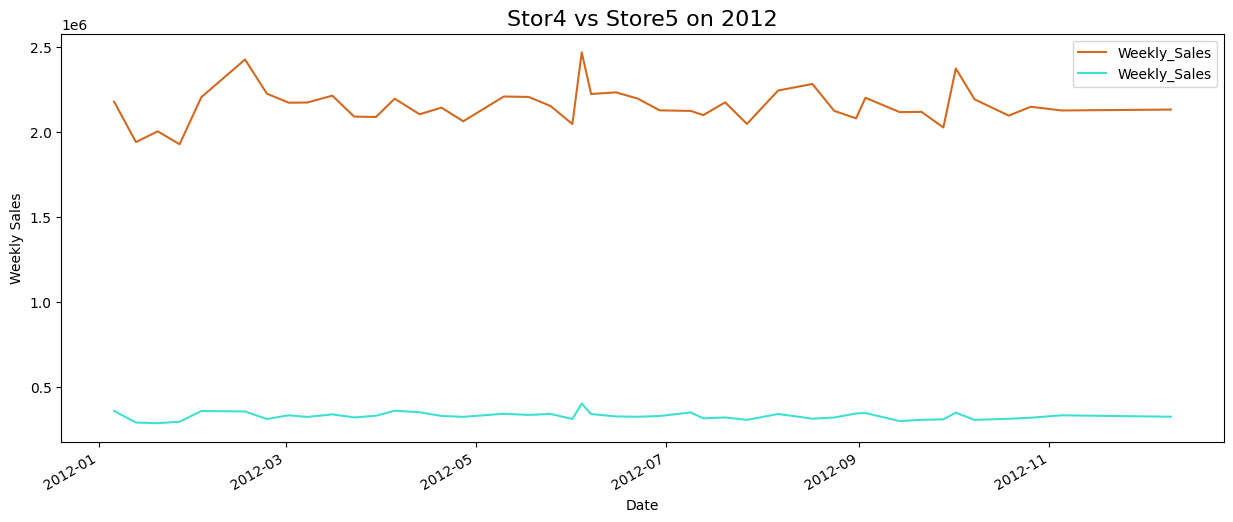

In [64]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Stor4 vs Store5 on 2012', fontsize = '16')
plt.show()

Clearly, we can see the irregularities between each store.

In [65]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [66]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\Tharakh George\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tharakh George\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tharakh George\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tharakh George\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0340      0.335     -3.086      0.002      -1.691      -0.377
ar.L2         -0.8742      0.382     -2.289      0.022      -1.623      -0.126
ar.L3         -0.5963      0.336     -1.777      0.076      -1.254       0.062
ar.L4         -0.6373      0.208     -3.058      0.002      -1.046      -0.229
ma.L1         -2.2757      0.361     -6.309      0.000      -2.983      -1.569
ma.L2          1.5765      0.691      2.282      0.023       0.222       2.931
ma.L3         -0.2979      0.354     -0.841      0.401      -0.993       0.397
ar.S.L52      -0.2866      0.145     -1.974      0.048      -0.571      -0.002
sigma2      3.419e+11   1.05e-12   3.26e+23      0.000    3.42e+11    3.42e+11


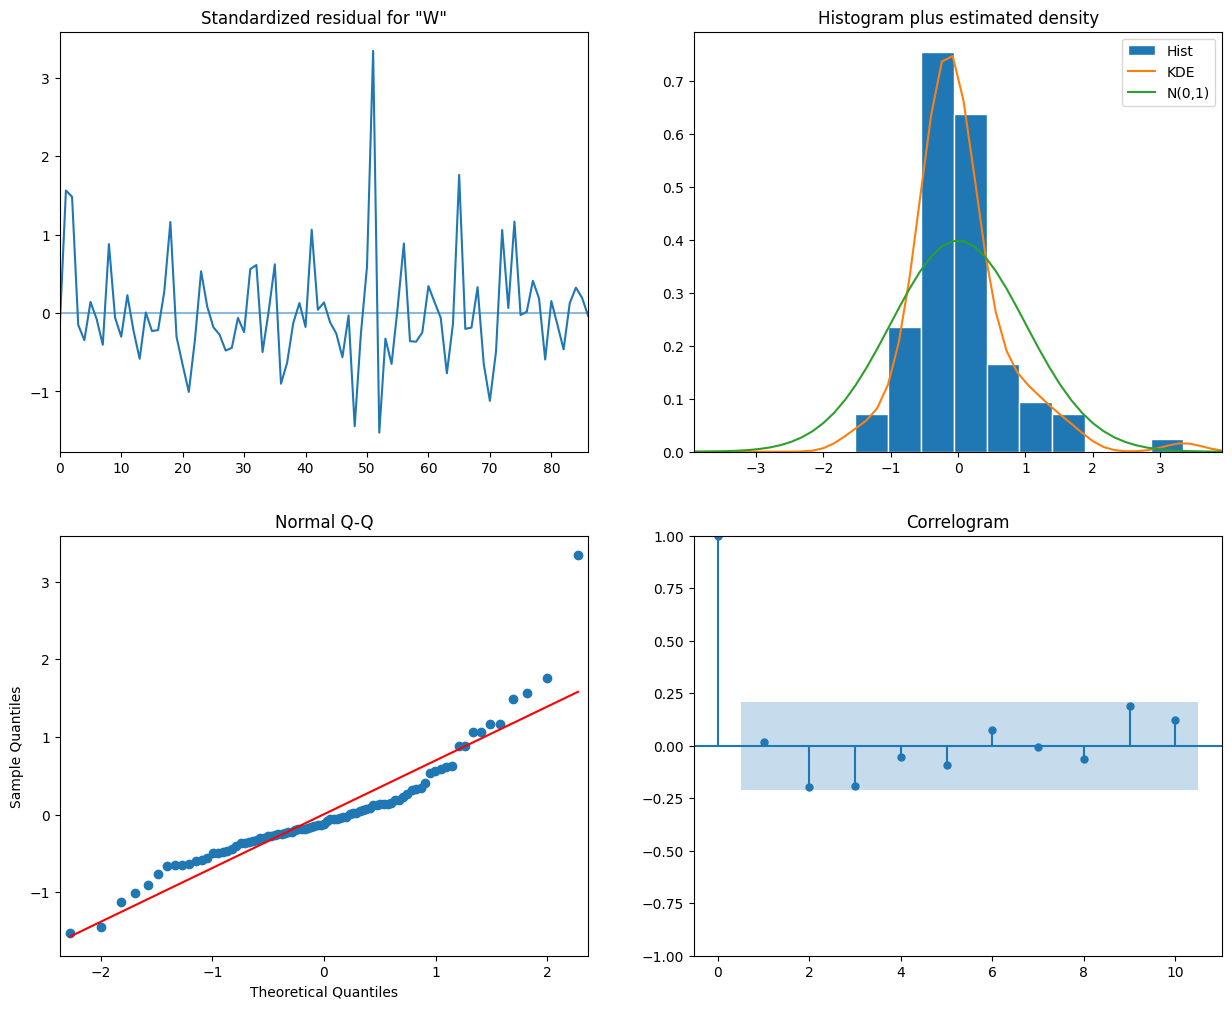

In [67]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [68]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

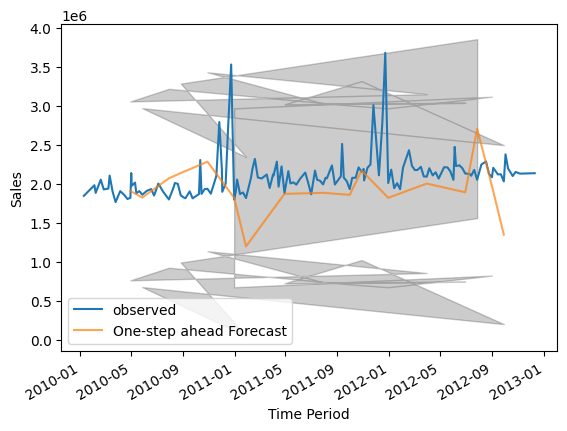

In [69]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [70]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 302811754140.44


In [71]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

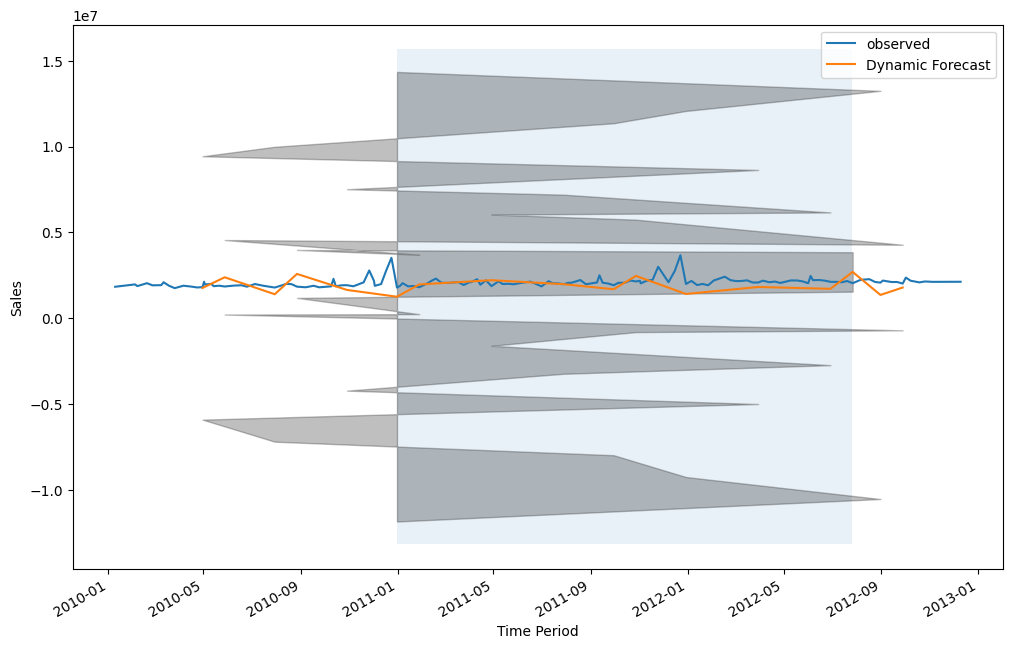

In [72]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [73]:
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    2.704423e+06
2010-08-27    2.589039e+06
2011-01-28    1.975885e+06
2010-05-28    2.393803e+06
2012-09-28    1.796642e+06
2011-10-28    2.475462e+06
2011-04-29    2.224910e+06
2012-06-29    1.723340e+06
2011-07-29    1.989762e+06
2010-10-29    1.657756e+06
2012-03-30    1.829028e+06
2010-04-30    1.772912e+06
2010-07-30    1.407675e+06
2011-09-30    1.698161e+06
2011-12-30    1.422674e+06
2012-08-31    1.366947e+06
2010-12-31    1.262656e+06
Name: predicted_mean, dtype: float64


In [74]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-06    2245257.18
2012-09-03    2202450.81
2012-10-02    2374660.64
2012-10-08    2193367.69
2012-11-05    2127661.17
2012-12-10    2133026.07
2012-09-14    2117854.60
2012-08-17    2283540.30
2012-10-19    2097266.85
2012-09-21    2119438.53
2012-08-24    2125241.68
2012-10-26    2149594.46
2012-07-27    2048613.65
2012-09-28    2027620.23
2012-08-31    2081181.35
Name: Weekly_Sales, dtype: float64


In [75]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 575490.32


In [76]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1601021.698146536


In [77]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

C:\Users\Tharakh George\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

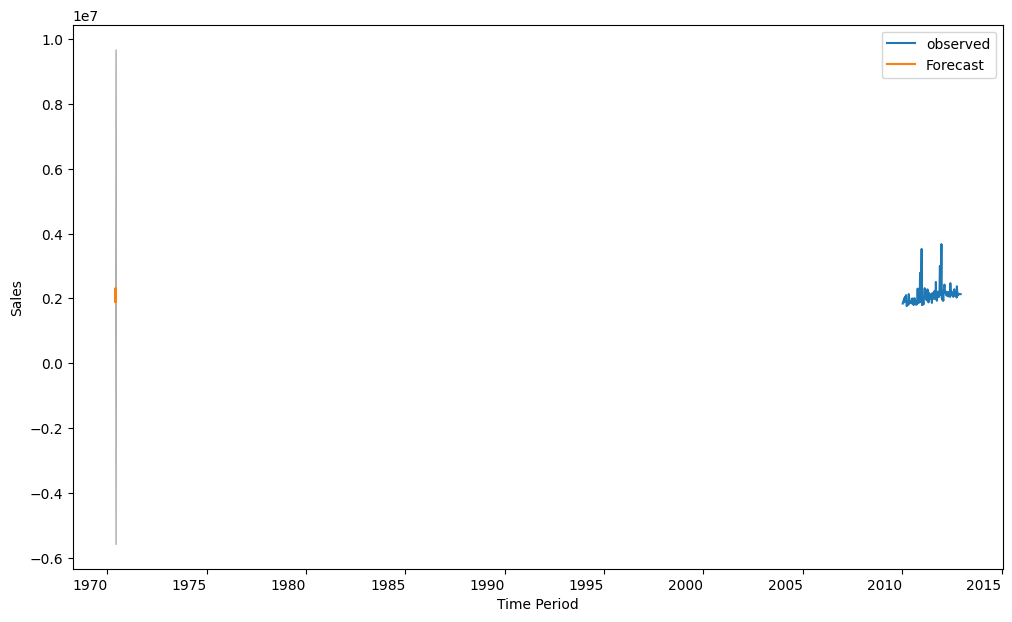

In [79]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')


plt.legend()
plt.show()

# Method 2 - Models Comparison

In [80]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from tbats import TBATS, BATS
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
import numpy as np

In [81]:
walmart=pd.read_csv('walmart.csv')
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [82]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [83]:
walmart.duplicated().sum()

0

In [84]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [85]:
walmart.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [86]:
## Select any store id from a list of 45 stores
a= int(input("Enter the store id:"))
walmart=walmart[walmart.Store==a][['Date','Weekly_Sales']]

Enter the store id:24


In [87]:
walmart.shape

(143, 2)

In [88]:
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart.set_index('Date', inplace=True)

In [89]:
result = adfuller(walmart['Weekly_Sales'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("Reject the null hypothesis. The time series is stationary.")
else:
    print("Fail to reject the null hypothesis. The time series is not stationary.")

ADF Statistic: -5.21271217616927
p-value: 8.281608598042004e-06
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}
Reject the null hypothesis. The time series is stationary.


In [90]:
train_size = len(walmart) - 12 
train, test = walmart.iloc[:train_size], walmart.iloc[train_size:]

In [91]:
# ARIMA
order_arima = (1, 1, 1)
model_arima = ARIMA(train, order=order_arima)
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=12)

In [92]:
# SARIMAX
order_sarimax = (1, 1, 1)  
seasonal_order_sarimax = (1, 1, 1, 12)  
model_sarimax = SARIMAX(train, order=order_sarimax, seasonal_order=seasonal_order_sarimax)
model_fit_sarimax = model_sarimax.fit()
forecast_sarimax = model_fit_sarimax.get_forecast(steps=12)

In [93]:
# AutoARIMA
model_autoarima = pm.auto_arima(train, seasonal=True, m=12)
print('The best model after using autoarima : \n')
print(model_autoarima.summary())
forecast_autoarima = model_autoarima.predict(n_periods=12)

The best model after using autoarima : 

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  131
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -1757.435
Date:                              Wed, 31 Jan 2024   AIC                           3522.869
Time:                                      18:15:43   BIC                           3534.370
Sample:                                           0   HQIC                          3527.543
                                              - 131                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.324e+05   8.43e+04     11.056      0.000   

In [94]:
# Prophet
prophet_model = Prophet(yearly_seasonality=True)
prophet_data = pd.DataFrame()
prophet_data['ds']=train.index
prophet_data['y']=train.values
prophet_model.fit(prophet_data)
future_prophet = prophet_model.make_future_dataframe(periods=12, freq='W-SUN')
forecast_prophet = prophet_model.predict(future_prophet)

18:15:46 - cmdstanpy - INFO - Chain [1] start processing
18:15:46 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
# TBATS
tbats_model = TBATS(seasonal_periods=[52])
tbats_fit = tbats_model.fit(train['Weekly_Sales'])
forecast_tbats = tbats_fit.forecast(steps=12)

In [96]:
# Calculate RMSE for each model
rmse_arima = sqrt(mean_squared_error(test, forecast_arima))
rmse_sarimax = sqrt(mean_squared_error(test, forecast_sarimax.predicted_mean))
rmse_autoarima = sqrt(mean_squared_error(test, forecast_autoarima))
rmse_prophet = sqrt(mean_squared_error(test, forecast_prophet['yhat'].tail(12)))
rmse_tbats = sqrt(mean_squared_error(test, forecast_tbats))

print('rmse_arima : ',rmse_arima)
print('rmse_sarimax : ',rmse_sarimax)
print('rmse_autoarima : ',rmse_autoarima)
print('rmse_prophet : ',rmse_prophet)
print('rmse_tbats : ',rmse_tbats)

rmse_arima :  80188.63587803843
rmse_sarimax :  137892.3549949545
rmse_autoarima :  76828.51830174708
rmse_prophet :  324994.9192023231
rmse_tbats :  62533.3766431784


In [97]:
# Calculate MAE for each model
mae_arima = mean_absolute_error(test, forecast_arima)
mae_sarimax = mean_absolute_error(test, forecast_sarimax.predicted_mean)
mae_autoarima = mean_absolute_error(test, forecast_autoarima)
mae_prophet = mean_absolute_error(test, forecast_prophet['yhat'].tail(12))
mae_tbats = mean_absolute_error(test, forecast_tbats)

print('mae_arima : ',mae_arima)
print('mae_sarimax : ',mae_sarimax)
print('mae_autoarima : ',mae_autoarima)
print('mae_prophet : ',mae_prophet)
print('mae_tbats : ',mae_tbats)

mae_arima :  71876.15231540498
mae_sarimax :  125067.14582578653
mae_autoarima :  68962.22758446595
mae_prophet :  248105.72135678856
mae_tbats :  49020.34930175642


In [98]:
# Calculate MAPE for each model
mape_arima = mean_absolute_percentage_error(test, forecast_arima)
mape_sarimax = mean_absolute_percentage_error(test, forecast_sarimax.predicted_mean)
mape_autoarima = mean_absolute_percentage_error(test, forecast_autoarima)
mape_prophet = mean_absolute_percentage_error(test, forecast_prophet['yhat'].tail(12))
mape_tbats = mean_absolute_percentage_error(test, forecast_tbats)

In [99]:
# Find the best model based on RMSE
best_model = min({
    'ARIMA': rmse_arima,
    'SARIMAX': rmse_sarimax,
    'AutoARIMA': rmse_autoarima,
    'Prophet': rmse_prophet,
    'TBATS': rmse_tbats,
}.items(), key=lambda x: x[1])

# Find the best model based on MAE
best_model_mae = min({
    'ARIMA': mae_arima,
    'SARIMAX': mae_sarimax,
    'AutoARIMA': mae_autoarima,
    'Prophet': mae_prophet,
    'TBATS': mae_tbats,

}.items(), key=lambda x: x[1])

# Find the best model based on MAPE
best_model_mape = min({
    'ARIMA': mape_arima,
    'SARIMAX': mape_sarimax,
    'AutoARIMA': mape_autoarima,
    'Prophet': mape_prophet,
    'TBATS': mape_tbats,

}.items(), key=lambda x: x[1])

print('mape_arima : ',mape_arima)
print('mape_sarimax : ',mape_sarimax)
print('mape_autoarima : ',mape_autoarima)
print('mape_prophet : ',mape_prophet)
print('mape_tbats : ',mape_tbats)

print(f"Best model: {best_model[0]} with RMSE: {best_model[1]:.2f}")
print(f"Best model based on MAE: {best_model_mae[0]} with MAE: {best_model_mae[1]:.2f}")
print(f"Best model based on MAPE: {best_model_mape[0]} with MAPE: {best_model_mape[1]:.2f}")

mape_arima :  0.05312424158016238
mape_sarimax :  0.09472349254722634
mape_autoarima :  0.051255560308255295
mape_prophet :  0.19048116810779972
mape_tbats :  0.03586242051533598
Best model: TBATS with RMSE: 62533.38
Best model based on MAE: TBATS with MAE: 49020.35
Best model based on MAPE: TBATS with MAPE: 0.04


TBATS Model is the best model as it has the lowest RMSE, MAE, MAPE

In [100]:
forecast_steps = 52
forecast_tbats = tbats_fit.forecast(steps=forecast_steps)
residuals = train['Weekly_Sales'] - tbats_fit.y_hat
residual_std = np.std(residuals)

In [101]:
weekly_dates=['05-02-2010','12-02-2010','19-02-2010','26-02-2010','05-03-2010','12-03-2010','19-03-2010','26-03-2010','02-04-2010','09-04-2010','16-04-2010','23-04-2010','30-04-2010','07-05-2010','14-05-2010','21-05-2010','28-05-2010','04-06-2010','11-06-2010','18-06-2010','25-06-2010','02-07-2010','09-07-2010','16-07-2010','23-07-2010','30-07-2010','06-08-2010','13-08-2010','20-08-2010','27-08-2010','03-09-2010','10-09-2010','17-09-2010','24-09-2010','01-10-2010','08-10-2010','15-10-2010','22-10-2010','29-10-2010','05-11-2010','12-11-2010','19-11-2010','26-11-2010','03-12-2010','10-12-2010','17-12-2010','24-12-2010','31-12-2010','07-01-2011','14-01-2011','21-01-2011','28-01-2011','04-02-2011','11-02-2011','18-02-2011','25-02-2011','04-03-2011','11-03-2011','18-03-2011','25-03-2011','01-04-2011','08-04-2011','15-04-2011','22-04-2011','29-04-2011','06-05-2011','13-05-2011','20-05-2011','27-05-2011','03-06-2011','10-06-2011','17-06-2011','24-06-2011','01-07-2011','08-07-2011','15-07-2011','22-07-2011','29-07-2011','05-08-2011','12-08-2011','19-08-2011','26-08-2011','02-09-2011','09-09-2011','16-09-2011','23-09-2011','30-09-2011','07-10-2011','14-10-2011','21-10-2011','28-10-2011','04-11-2011','11-11-2011','18-11-2011','25-11-2011','02-12-2011','09-12-2011','16-12-2011','23-12-2011','30-12-2011','06-01-2012','13-01-2012','20-01-2012','27-01-2012','03-02-2012','10-02-2012','17-02-2012','24-02-2012','02-03-2012','09-03-2012','16-03-2012','23-03-2012','30-03-2012','06-04-2012','13-04-2012','20-04-2012','27-04-2012','04-05-2012','11-05-2012','18-05-2012','25-05-2012','01-06-2012','08-06-2012','15-06-2012','22-06-2012','29-06-2012','06-07-2012','13-07-2012','20-07-2012','27-07-2012','03-08-2012','10-08-2012','17-08-2012','24-08-2012','31-08-2012','07-09-2012','14-09-2012','21-09-2012','28-09-2012','05-10-2012','12-10-2012','19-10-2012','26-10-2012','02-11-2012','09-11-2012','16-11-2012','23-11-2012','30-11-2012','07-12-2012','14-12-2012','21-12-2012','28-12-2012','04-01-2013','11-01-2013','18-01-2013','25-01-2013','01-02-2013','08-02-2013','15-02-2013','22-02-2013','01-03-2013','08-03-2013','15-03-2013','22-03-2013','29-03-2013','05-04-2013','12-04-2013','19-04-2013','26-04-2013','03-05-2013','10-05-2013','17-05-2013','24-05-2013','31-05-2013','07-06-2013','14-06-2013','21-06-2013','28-06-2013','05-07-2013','12-07-2013','19-07-2013','26-07-2013','02-08-2013','09-08-2013','16-08-2013','23-08-2013','30-08-2013','06-09-2013','13-09-2013','20-09-2013','27-09-2013','04-10-2013','11-10-2013','18-10-2013','25-10-2013']
df_dates = pd.DataFrame(index=pd.to_datetime(weekly_dates, format='%d-%m-%Y'))

df_dates.loc[:143, 'Weekly_Sales'] = walmart['Weekly_Sales'].values
df_dates.loc[143:, 'Weekly_Sales'] = forecast_tbats

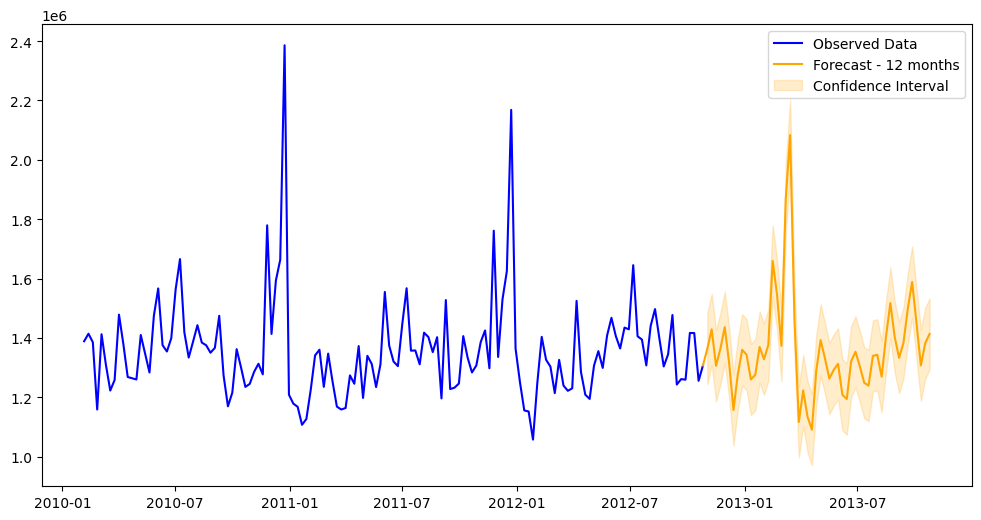

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(df_dates.index[:143], df_dates['Weekly_Sales'][:143], label='Observed Data', color='blue')
plt.plot(df_dates.index[142:], df_dates['Weekly_Sales'][142:], label='Forecast - 12 months', color='orange')
lower_ci = df_dates['Weekly_Sales'][143:] - 1.96 * residual_std
upper_ci = df_dates['Weekly_Sales'][143:] + 1.96 * residual_std
plt.fill_between(df_dates.index[143:], lower_ci, upper_ci, color='orange', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()

In [103]:
metrics_data = {
    'Model': ['ARIMA', 'SARIMAX', 'AutoARIMA', 'Prophet', 'TBATS'],
    'RMSE': [rmse_arima, rmse_sarimax, rmse_autoarima, rmse_prophet, rmse_tbats],
    'MAE': [mae_arima, mae_sarimax, mae_autoarima, mae_prophet, mae_tbats],
    'MAPE': [mape_arima, mape_sarimax, mape_autoarima, mape_prophet, mape_tbats]
}

rmse_df = pd.DataFrame(metrics_data, columns=['Model', 'RMSE'])
mae_df = pd.DataFrame(metrics_data, columns=['Model', 'MAE'])
mape_df = pd.DataFrame(metrics_data, columns=['Model', 'MAPE'])

In [104]:
rmse_df

,Model,RMSE
0,ARIMA,80188.635878
1,SARIMAX,137892.354995
2,AutoARIMA,76828.518302
3,Prophet,324994.919202
4,TBATS,62533.376643


In [105]:
mae_df

,Model,MAE
0,ARIMA,71876.152315
1,SARIMAX,125067.145826
2,AutoARIMA,68962.227584
3,Prophet,248105.721357
4,TBATS,49020.349302


In [106]:
mape_df

,Model,MAPE
0,ARIMA,0.053124
1,SARIMAX,0.094723
2,AutoARIMA,0.051256
3,Prophet,0.190481
4,TBATS,0.035862


In [107]:
metrics_df = pd.merge(rmse_df, mae_df, on='Model').merge(mape_df, on='Model')
metrics_df

,Model,RMSE,MAE,MAPE
0,ARIMA,80188.635878,71876.152315,0.053124
1,SARIMAX,137892.354995,125067.145826,0.094723
2,AutoARIMA,76828.518302,68962.227584,0.051256
3,Prophet,324994.919202,248105.721357,0.190481
4,TBATS,62533.376643,49020.349302,0.035862


In [108]:
metrics_mae_sorted = metrics_df.sort_values(by='MAE', ascending=True)
metrics_mae_sorted

,Model,RMSE,MAE,MAPE
4,TBATS,62533.376643,49020.349302,0.035862
2,AutoARIMA,76828.518302,68962.227584,0.051256
0,ARIMA,80188.635878,71876.152315,0.053124
1,SARIMAX,137892.354995,125067.145826,0.094723
3,Prophet,324994.919202,248105.721357,0.190481
